PROYECTO FINAL TECNICAS DE APRENDIZAJE DE MAQUINA
-Andres Useche  - Juan Soto  - Rafael Torregroza 

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

CARGA, EXPLORACIÓN Y PREPROCESAMIENTO DE DATOS

In [11]:


# Cargar los datos
file_path = r"C:/Users/usech/Downloads/health_data.csv"
df = pd.read_csv(file_path)

# Mostrar dimensiones y primeras filas
display(df.shape), display(df.head())


(20000, 56)

,Edad,Género,Estado civil,Altura,Peso,Índice de masa corporal,¿Fuma actualmente?,¿Fumó en el pasado?,¿Consume alcohol frecuentemente?,Nivel de actividad física,...,¿Sufre de problemas de visión?,¿Tiene problemas de audición?,¿Ha sufrido de fracturas óseas en el pasado?,Nivel de satisfacción con la vida,Enfermedad cardiovascular,Diabetes,Asma,Cáncer,Obesidad,Depresión/Ansiedad
0,76.596326,Otro,Soltero,153.681426,76.920289,29.612895,No,Sí,No,Moderado,...,No,No,No,Medio,0.674302,-0.171059,1.142946,0.293202,-0.130552,0.228336
1,79.795297,Otro,Casado,155.882307,66.743641,9.902543,No,No,No,Moderado,...,Sí,No,Sí,Bajo,-0.014915,0.101641,-0.059422,1.047785,0.216788,1.211533
2,90.603394,Otro,Casado,176.481841,124.818134,27.248719,Sí,No,Sí,Moderado,...,No,No,No,Medio,0.981927,0.054446,0.918964,0.138127,-0.030003,-0.205018
3,22.154276,Femenino,Viudo,158.681358,114.807668,27.634473,No,No,No,Moderado,...,No,Sí,No,Bajo,1.147131,0.256350,-0.159599,-0.260462,1.363624,0.291855
4,46.176676,Masculino,Casado,184.451263,60.217207,24.094841,No,Sí,No,Sedentario,...,No,No,No,Medio,1.067995,0.225792,0.165198,0.015367,0.960565,1.427700


(None, None)

In [13]:
# Verificar tipos de datos y valores únicos por columna
data_info = pd.DataFrame({
    "Tipo de Dato": df.dtypes,
    "Valores Únicos": df.nunique(),
    "Valores Nulos": df.isnull().sum()
})

# Ordenar para ver mejor
data_info_sorted = data_info.sort_values(by="Valores Únicos", ascending=True)

# Mostrar en pantalla
data_info_sorted.head(20)  # Puedes cambiar el número si deseas ver más


,Tipo de Dato,Valores Únicos,Valores Nulos
¿Tiene antecedentes de obesidad en la familia?,object,2,0
¿Ha sufrido de fracturas óseas en el pasado?,object,2,0
Presión arterial,object,2,0
¿Tiene antecedentes de asma?,object,2,0
¿Padece de alguna alergia?,object,2,0
¿Ha tenido infecciones respiratorias frecuentes en el último año?,object,2,0
¿Tiene dificultades para respirar durante el ejercicio?,object,2,0
¿Toma suplementos vitamínicos?,object,2,0
¿Ha experimentado pérdida de peso no intencionada?,object,2,0
¿Ha tenido dolor en el pecho recientemente?,object,2,0


In [15]:
print("\ninformacion general del dataset: ")
display(df.info())
print("\n estadisticas descriptivas del dataset:")
display(df.describe())


informacion general del dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 56 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Edad                                                                 20000 non-null  float64
 1   Género                                                               20000 non-null  object 
 2   Estado civil                                                         20000 non-null  object 
 3   Altura                                                               20000 non-null  float64
 4   Peso                                                                 20000 non-null  float64
 5   Índice de masa corporal                                              20000 non-null  float64
 6   ¿Fuma actualmente?                                                 

None


 estadisticas descriptivas del dataset:


,Edad,Altura,Peso,Índice de masa corporal,Enfermedad cardiovascular,Diabetes,Asma,Cáncer,Obesidad,Depresión/Ansiedad
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,51.084494,174.571469,84.591538,24.939289,0.303130,0.205536,0.150921,0.105589,0.248486,0.401899
std,21.536435,16.112692,22.660278,5.570737,0.514926,0.450558,0.399708,0.342888,0.483748,0.545406
min,-9.736027,125.857221,18.446075,-5.220232,-0.871191,-0.770928,-0.693624,-0.560999,-0.951822,-0.956367
25%,34.371998,161.937829,66.996990,21.143283,-0.085642,-0.096801,-0.094377,-0.087778,-0.094818,-0.048414
50%,51.153608,174.590126,84.533468,24.979186,0.130448,0.067079,0.039876,0.021789,0.090520,0.242945
75%,67.944719,187.253346,102.438885,28.724510,0.787913,0.317676,0.207847,0.151763,0.547562,0.924828
max,116.326437,225.202089,153.046182,48.318898,1.874630,1.843066,1.551884,1.495570,1.821224,1.915788


In [ ]:
Graficas descriptivas

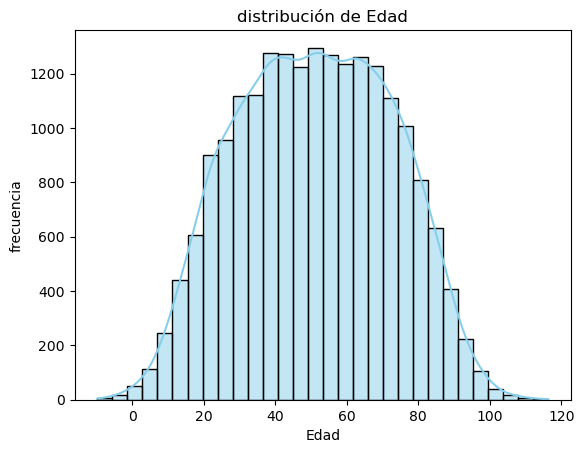

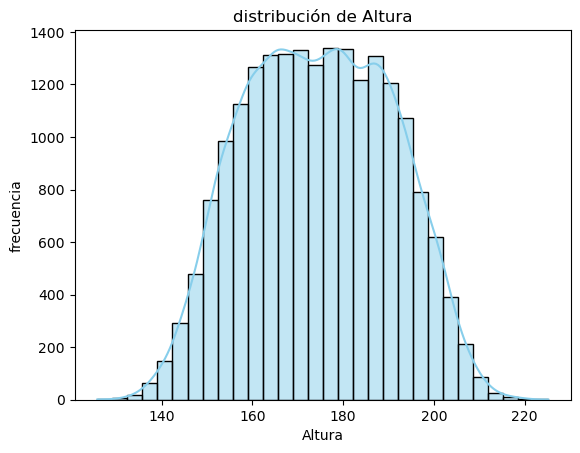

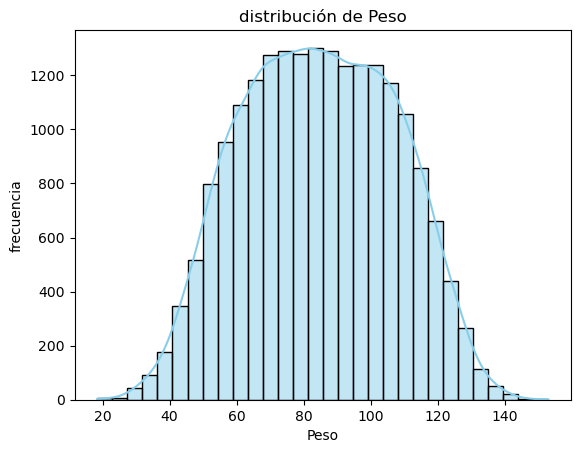

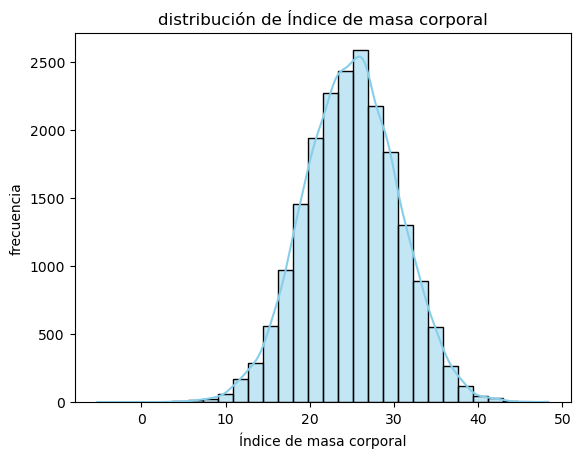

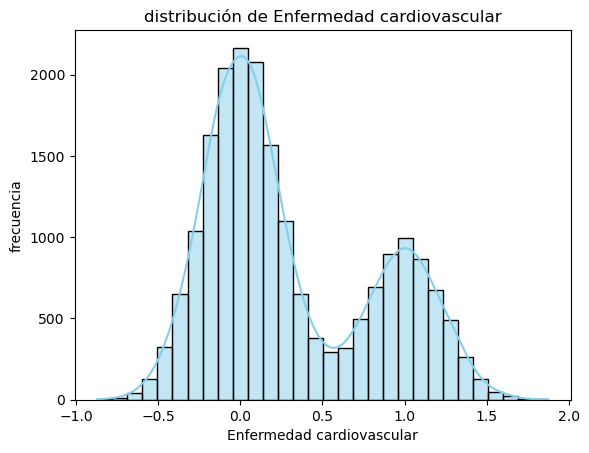

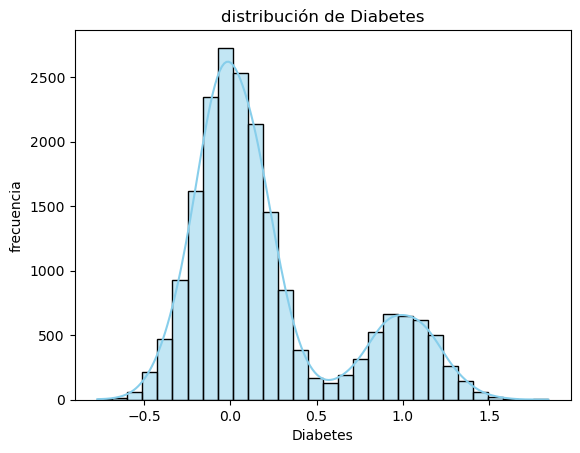

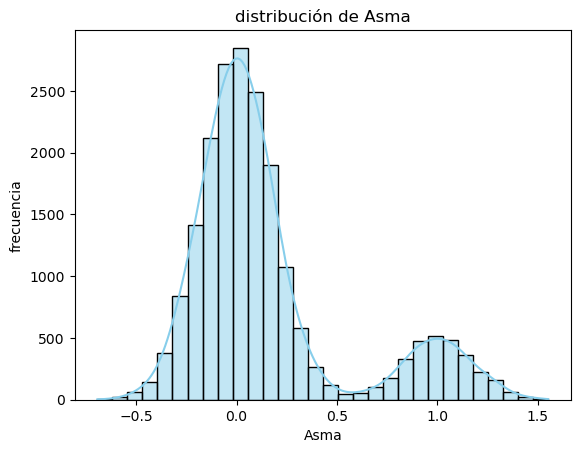

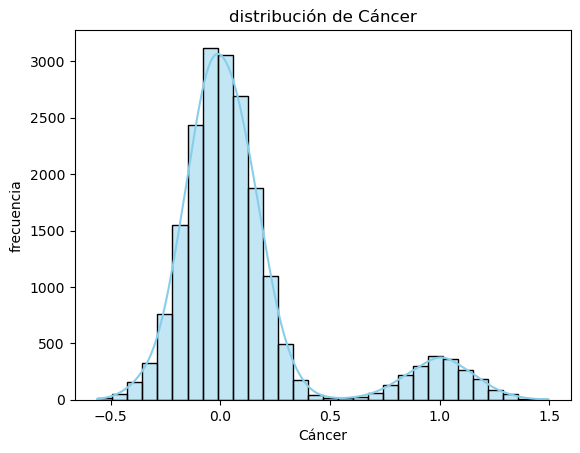

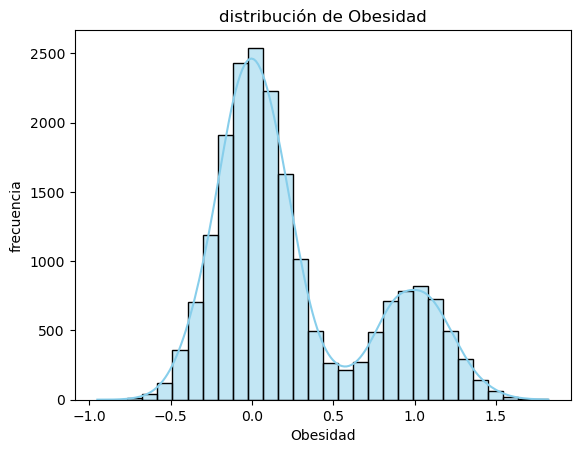

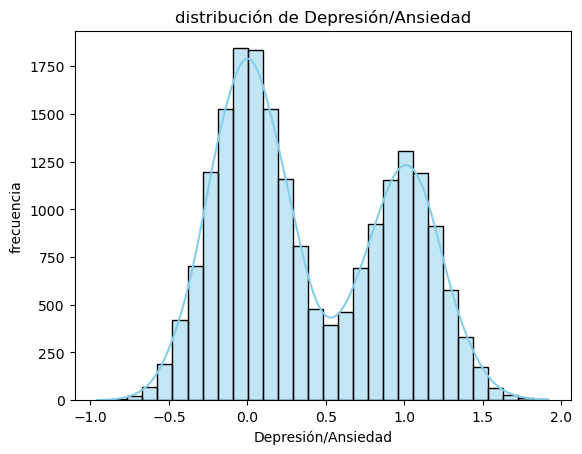

In [17]:
#distribucion de las variables numericas
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30, color = 'skyblue')
    plt.title(f'distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('frecuencia')
    plt.show()


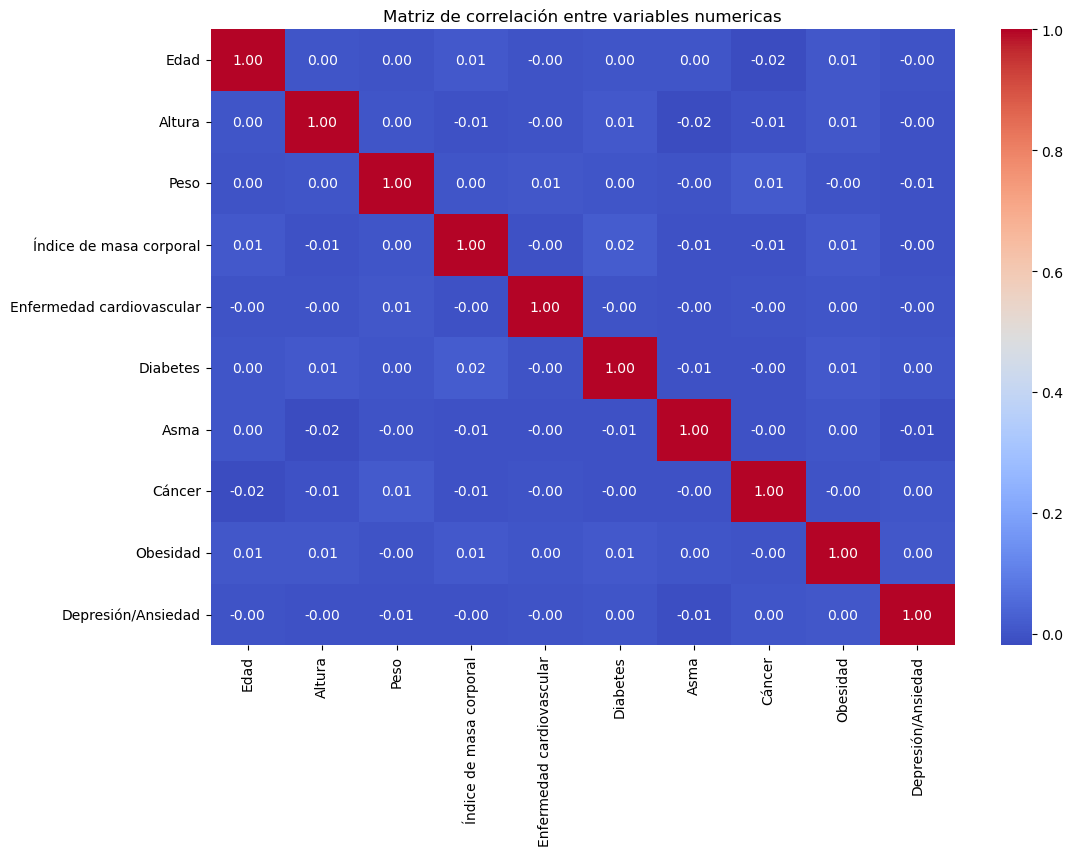

In [19]:
plt.figure(figsize=(12,8))
correlacion_matrix = df[numeric_cols].corr()
sns.heatmap(correlacion_matrix, annot=True,  cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numericas')
plt.show()

In [21]:
# 1. Convertir Sí/No a 1/0 en todas las columnas tipo object con solo 2 valores únicos
yes_no_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() == 2]
df[yes_no_cols] = df[yes_no_cols].replace({'Sí': 1, 'No': 0})

# 2. Convertir etiquetas continuas de enfermedades a binarias
etiquetas = ['Enfermedad cardiovascular', 'Diabetes', 'Asma', 'Cáncer', 'Obesidad', 'Depresión/Ansiedad']
df[etiquetas] = df[etiquetas].applymap(lambda x: 1 if x > 0 else 0)  # usa umbral 0

# Verificar cambio
df[yes_no_cols + etiquetas].head()


C:\Users\usech\AppData\Local\Temp\ipykernel_29880\2196431214.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_cols] = df[yes_no_cols].replace({'Sí': 1, 'No': 0})
C:\Users\usech\AppData\Local\Temp\ipykernel_29880\2196431214.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[etiquetas] = df[etiquetas].applymap(lambda x: 1 if x > 0 else 0)  # usa umbral 0


,¿Fuma actualmente?,¿Fumó en el pasado?,¿Consume alcohol frecuentemente?,¿Tiene una dieta equilibrada?,¿Consume frutas y verduras diariamente?,¿Duerme al menos 7 horas por noche?,¿Experimenta estrés con frecuencia?,¿Tiene antecedentes de hipertensión en la familia?,¿Tiene antecedentes de diabetes en la familia?,¿Tiene antecedentes de cáncer en la familia?,...,¿Ha tenido infecciones frecuentes?,¿Sufre de problemas de visión?,¿Tiene problemas de audición?,¿Ha sufrido de fracturas óseas en el pasado?,Enfermedad cardiovascular,Diabetes,Asma,Cáncer,Obesidad,Depresión/Ansiedad
0,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
1,0,0,0,1,1,1,1,0,0,0,...,0,1,0,1,0,1,0,1,1,1
2,1,0,1,1,0,0,1,1,0,0,...,0,0,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,1,1
4,0,1,0,0,1,1,0,0,1,0,...,1,0,0,0,1,1,1,1,1,1


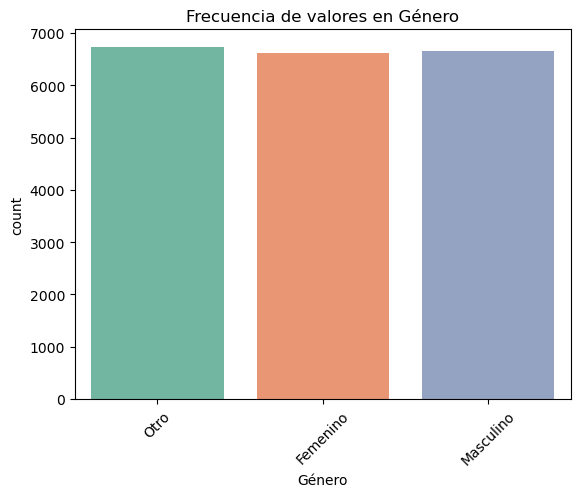

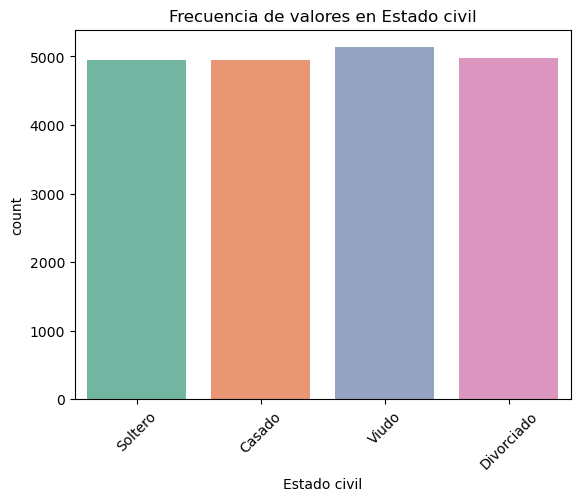

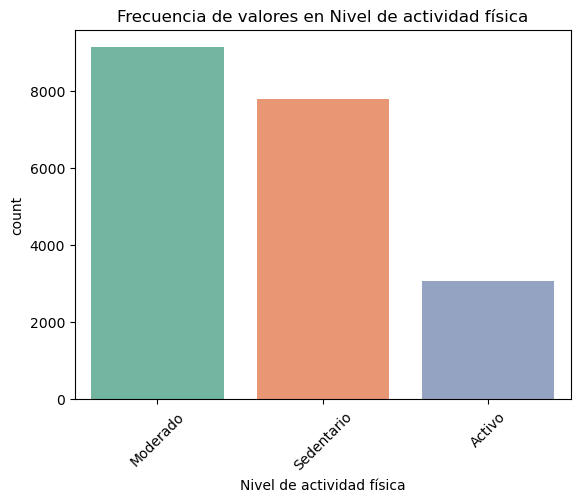

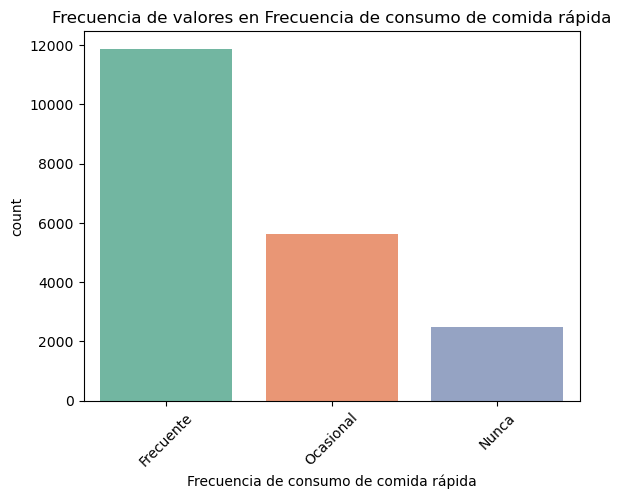

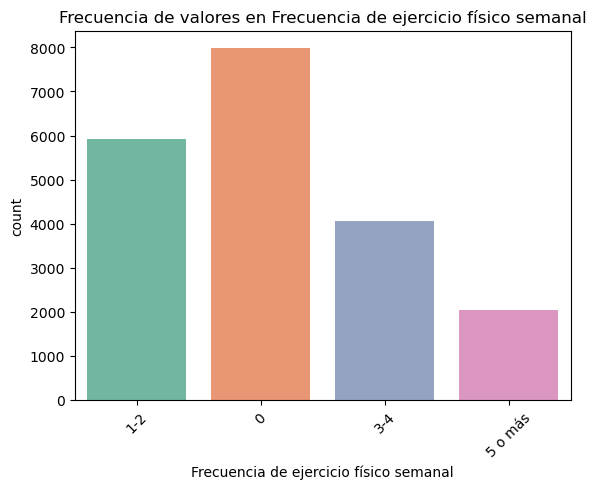

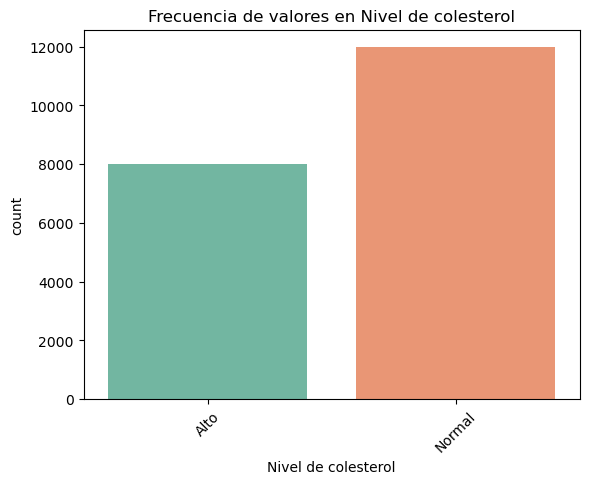

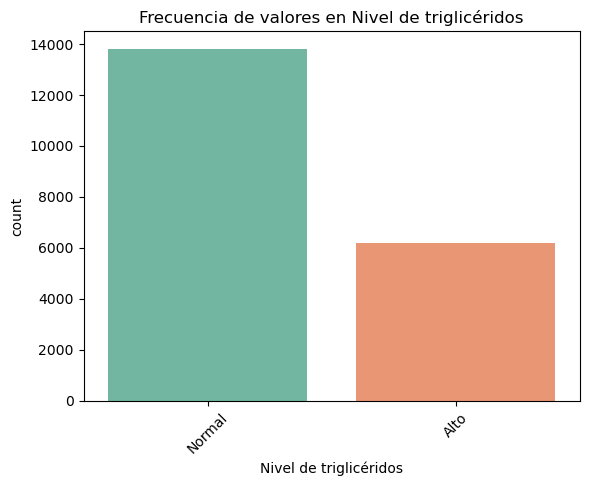

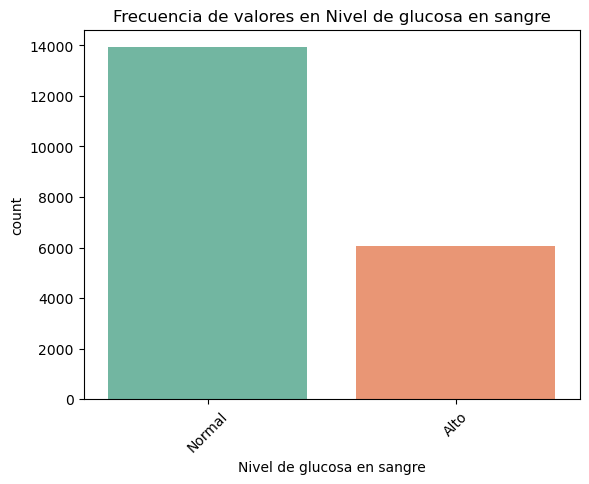

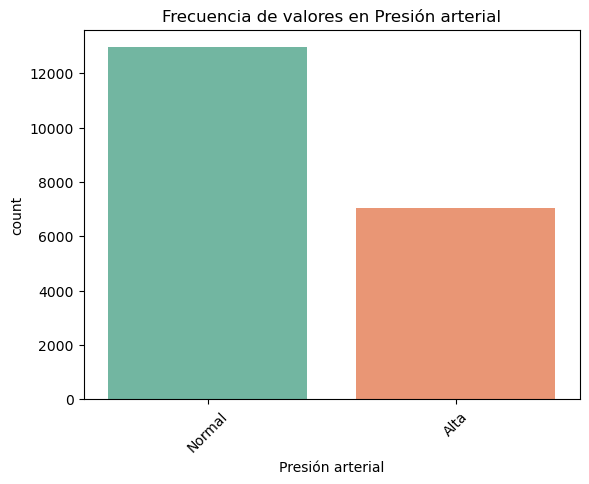

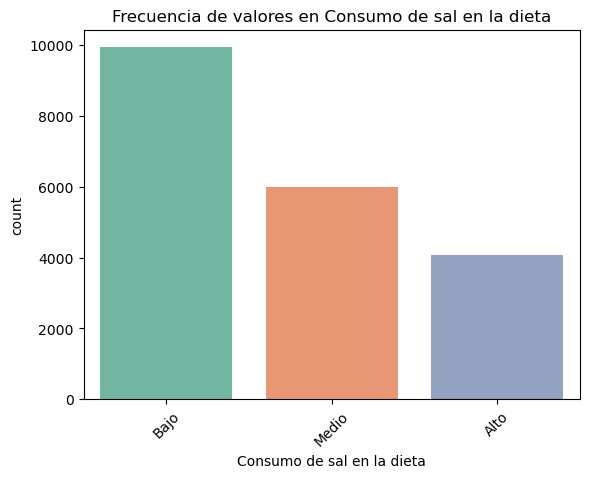

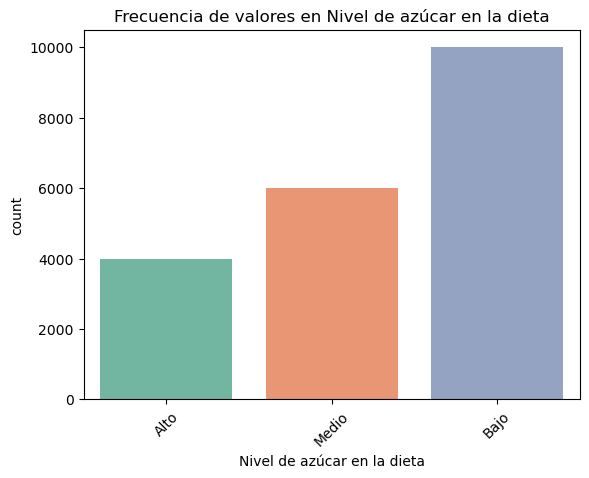

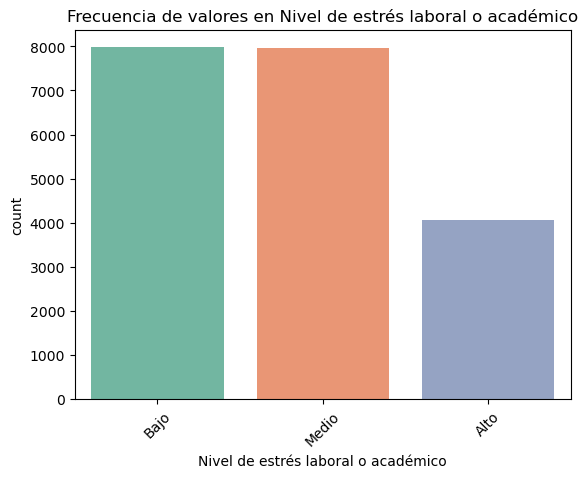

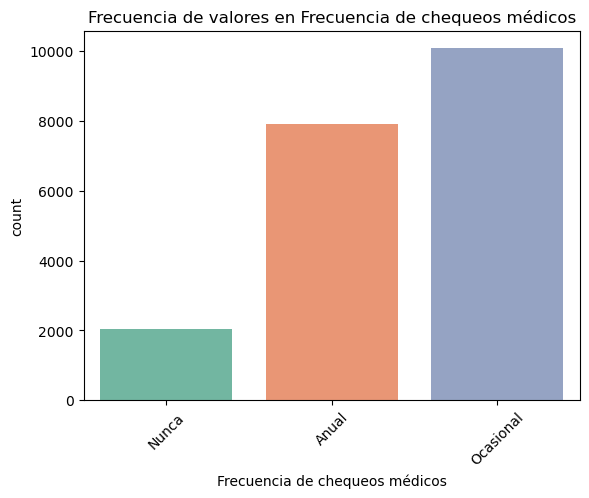

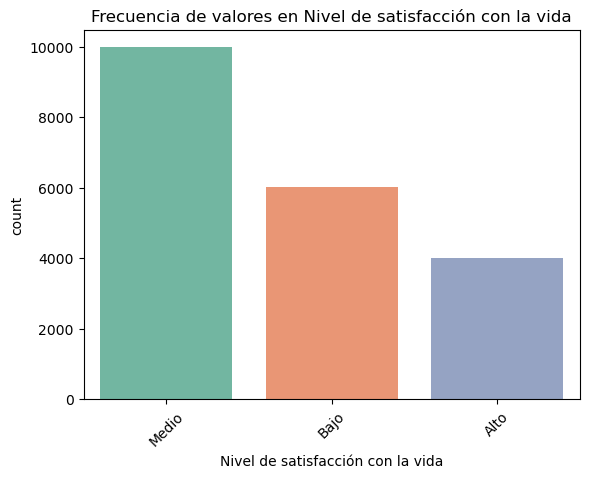

In [199]:
#Conteo de valores de variables categoricas
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False)

    plt.title(f'Frecuencia de valores en {col}')
    plt.xticks(rotation=45)
    plt.show()

Distribución de las clases de la variable objetivo

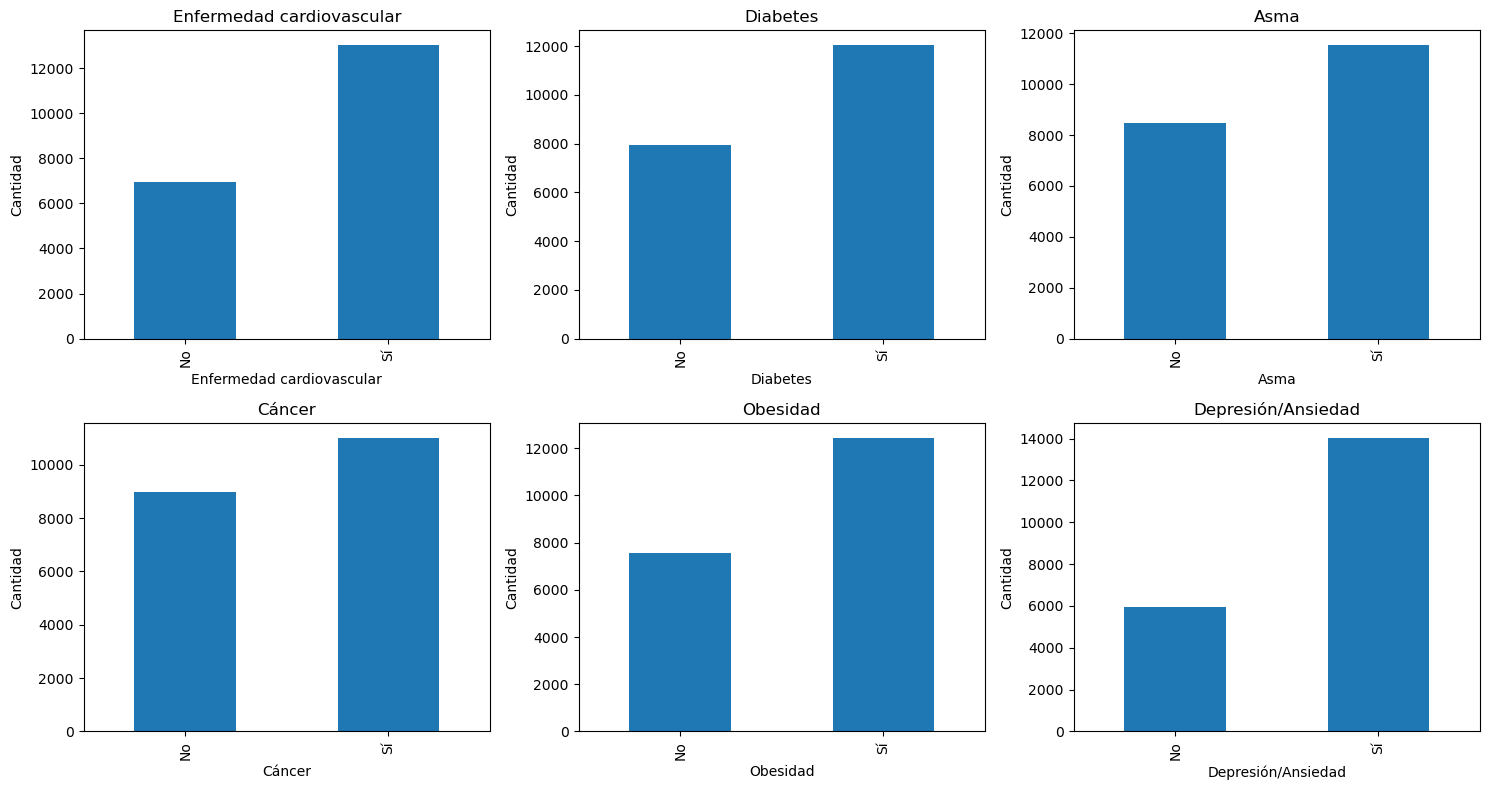

In [201]:
import matplotlib.pyplot as plt

# Lista de etiquetas objetivo
target_labels = ['Enfermedad cardiovascular', 'Diabetes', 'Asma', 'Cáncer', 'Obesidad', 'Depresión/Ansiedad']

# Crear gráfico de barras para distribución binaria
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()

for i, label in enumerate(target_labels):
    df[label].value_counts().sort_index().plot(kind='bar', ax=axs[i])
    axs[i].set_title(label)
    axs[i].set_xticks([0, 1])
    axs[i].set_xticklabels(['No', 'Sí'])
    axs[i].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()


Matrices de correlación

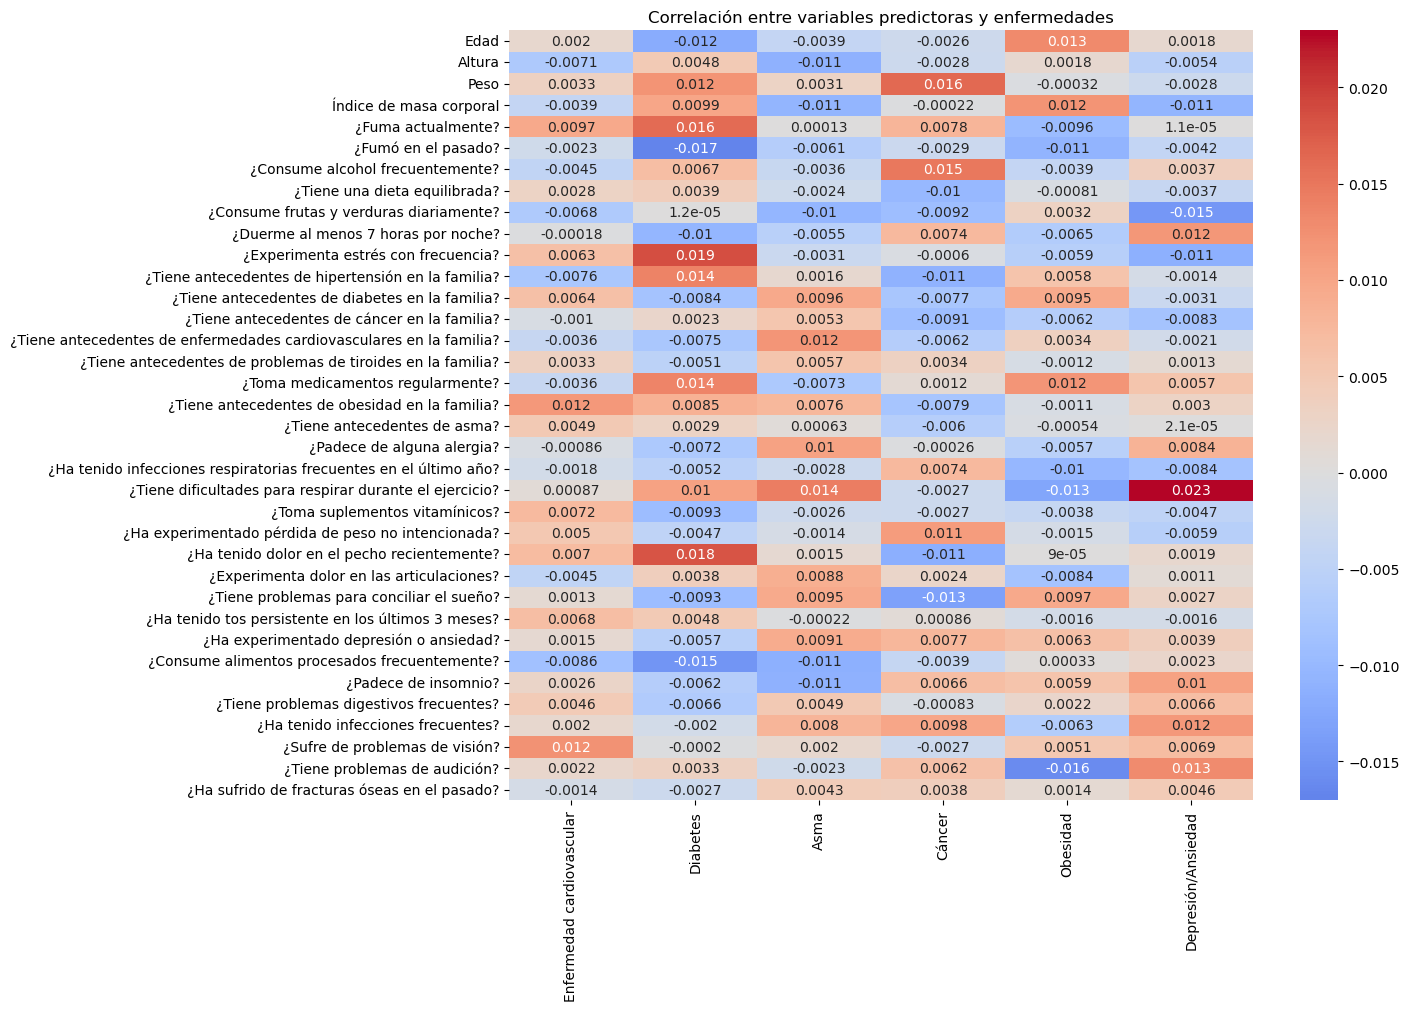

In [175]:
# Recargar archivos y bibliotecas después del reinicio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo cargado anteriormente

# Preprocesamiento necesario para llegar al paso anterior

# 1. Convertir Sí/No a 1/0 en columnas tipo object con solo 2 valores únicos
yes_no_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() == 2]
df[yes_no_cols] = df[yes_no_cols].replace({'Sí': 1, 'No': 0})

# 2. Discretizar variables objetivo
target_labels = ['Enfermedad cardiovascular', 'Diabetes', 'Asma', 'Cáncer', 'Obesidad', 'Depresión/Ansiedad']
df[target_labels] = df[target_labels].applymap(lambda x: 1 if x > 0 else 0)

# 3. Calcular matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# 4. Subset de correlaciones con etiquetas
correlations_with_targets = correlation_matrix[target_labels].drop(index=target_labels)

# 5. Graficar
plt.figure(figsize=(12, 10))
sns.heatmap(correlations_with_targets, annot=True, cmap='coolwarm', center=0)
plt.title("Correlación entre variables predictoras y enfermedades")
plt.show()


Detección de outliers

In [23]:
# Función para detectar outliers usando el rango intercuartílico (IQR)
def detectar_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 -Q1
    outliers = df[(df[col] < Q1 -1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    return outliers
#  Revisar columnas con posibles outliers
for col in numeric_cols:
    outliers = detectar_outliers(col)
    print(f"{col} : {len(outliers)} outliers detectados")

Edad : 0 outliers detectados
Altura : 0 outliers detectados
Peso : 0 outliers detectados
Índice de masa corporal : 135 outliers detectados
Enfermedad cardiovascular : 0 outliers detectados
Diabetes : 0 outliers detectados
Asma : 0 outliers detectados
Cáncer : 0 outliers detectados
Obesidad : 0 outliers detectados
Depresión/Ansiedad : 0 outliers detectados


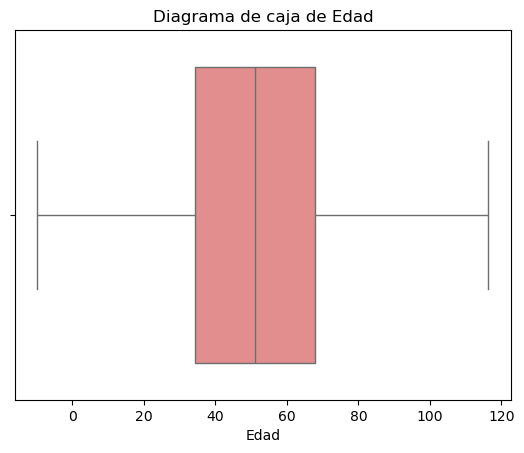

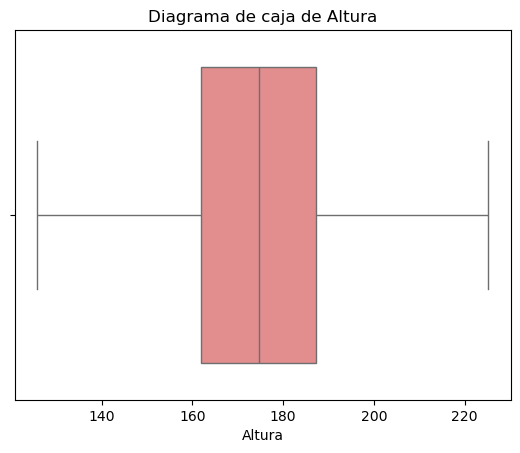

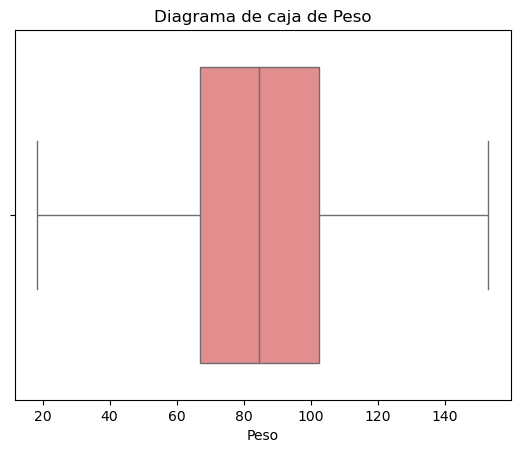

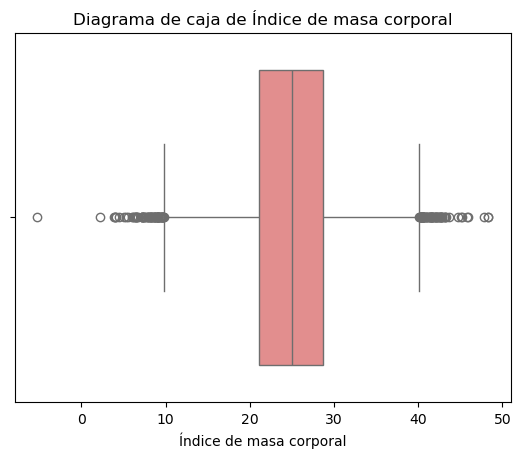

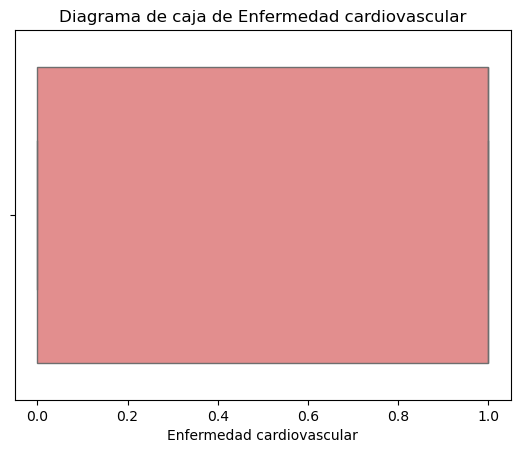

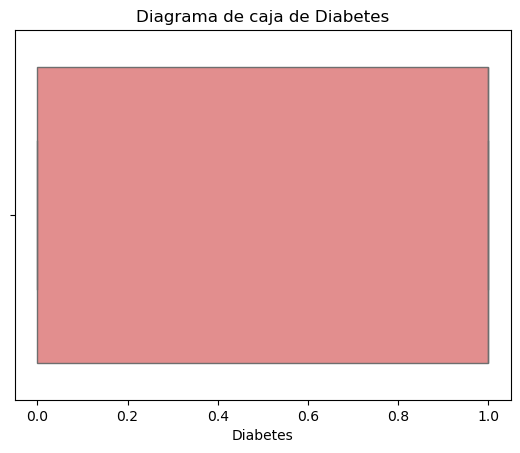

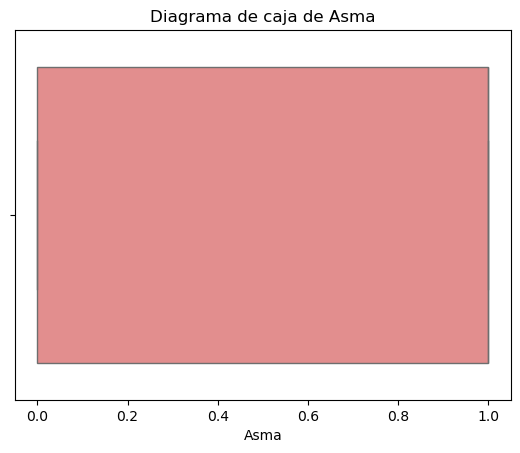

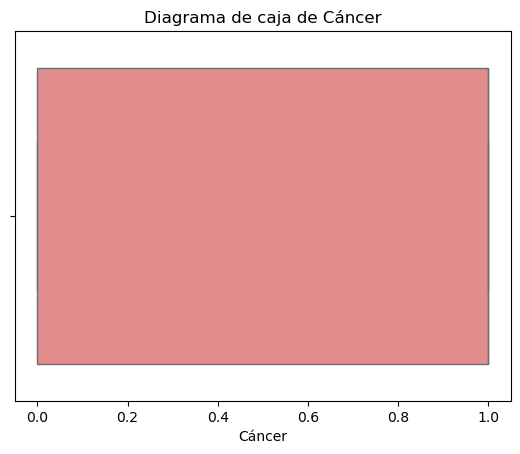

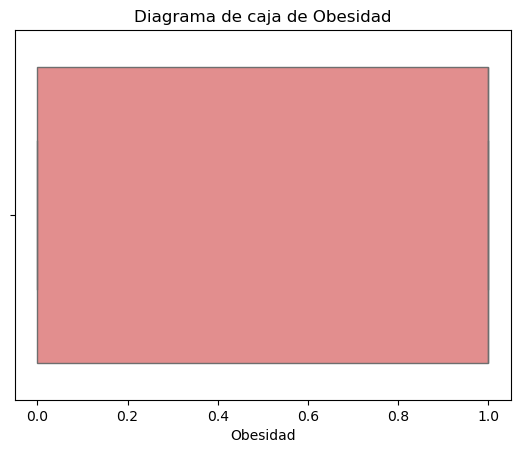

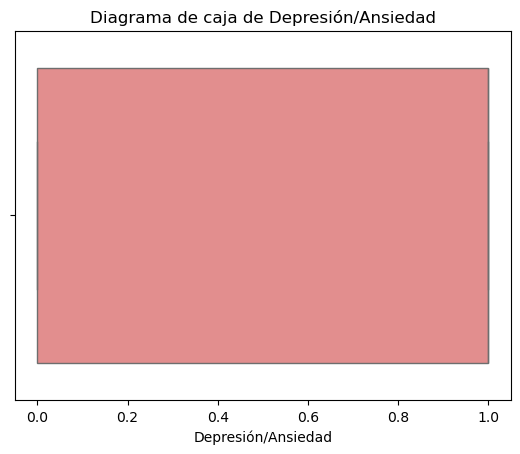

In [207]:
#diagramas de caja para detectasr outliers
for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=df, x=col, color='lightcoral')
    plt.title(f'Diagrama de caja de {col}')
    plt.xlabel(col)
    plt.show()

**MODELAMIENTO**

In [33]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# 1. Reemplazar Sí/No por 1/0
yes_no_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() == 2]
df[yes_no_cols] = df[yes_no_cols].replace({'Sí': 1, 'No': 0})

# 2. Discretizar etiquetas
target_labels = ['Enfermedad cardiovascular', 'Diabetes', 'Asma', 'Cáncer', 'Obesidad', 'Depresión/Ansiedad']
for label in target_labels:
    df[label] = df[label].map(lambda x: 1 if x > 0 else 0)

# 3. Detectar TODAS las columnas categóricas (tipo object)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# 4. Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Variables predictoras
X = df_encoded.drop(columns=target_labels)

# 6. Estandarización y PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# 7. Varianza explicada
explained_variance = pd.DataFrame({
    "Componente Principal": [f"PC{i+1}" for i in range(10)],
    "Varianza Explicada (%)": pca.explained_variance_ratio_ * 100
})
print(explained_variance)


  Componente Principal  Varianza Explicada (%)
0                  PC1                2.813897
1                  PC2                2.732626
2                  PC3                2.681300
3                  PC4                2.669503
4                  PC5                2.645838
5                  PC6                2.431520
6                  PC7                2.184910
7                  PC8                2.179350
8                  PC9                2.158293
9                 PC10                2.141704


---

###  Justificación de la Selección de Variables

####  1. **Por análisis de correlación:**

Se observó que aunque la mayoría de variables tienen **correlaciones muy bajas**, algunas presentan relaciones como:

| Enfermedad             | Variables con mayor correlación positiva                     |
| ---------------------- | ------------------------------------------------------------ |
| **Obesidad**           | Índice de masa corporal, Antecedentes familiares de obesidad |
| **Asma**               | Dificultades para respirar, Antecedentes de asma             |
| **Depresión/Ansiedad** | Estrés frecuente, Depresión previa, Problemas para dormir    |
| **Cáncer**             | Antecedentes familiares de cáncer                            |
| **Diabetes**           | Antecedentes familiares de diabetes, Dieta, Peso             |
| **Cardiovascular**     | Colesterol, Hipertensión, Edad                               |

Estas variables fueron seleccionadas como **claves** por su coherencia médica y su correlación directa, aunque fueron debiles al hacer la matriz de correlacion
---

####  2. ** PCA:**

El Análisis de Componentes Principales mostró que los datos están muy distribuidos (cada componente solo explica \~2.7% de la varianza), pero permitió identificar combinaciones de variables latentes que podrían ser útiles en modelos como SVM o redes neuronales, donde no es indispensable la interpretación individual de cada variable.

**Conclusión**:

* Para modelos interpretables (Árboles, Logistic Regression): se usarán las variables con correlación más alta con cada enfermedad daba por este analisis
* Para modelos complejos (SVM, MLP): se puede usar el conjunto completo o reducido por la aplicacion de PCA.

---



In [27]:
print("df_encoded - Filas:", df_encoded.shape[0])
print("df_encoded - Columnas:", df_encoded.shape[1])


df_encoded - Filas: 20000
df_encoded - Columnas: 68


In [227]:
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])


Número de filas: 20000
Número de columnas: 56


In [229]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=target_labels)
y = df_encoded[target_labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

# Espacio reducido pero útil de hiperparámetros para SVM
param_grid_svm = {
    'estimator__C': [0.1, 1, 10],
    'estimator__kernel': ['linear', 'rbf'],
    'estimator__gamma': ['scale', 'auto'],
    'estimator__coef0': [0.0],  # solo necesario para 'poly' o 'sigmoid', aquí no lo usamos
    'estimator__degree': [3]    # solo para 'poly', igual lo dejamos fijo
}

# Definir modelo base
ovr_svm = OneVsRestClassifier(SVC())

# GridSearchCV
grid_svm = GridSearchCV(
    estimator=ovr_svm,
    param_grid=param_grid_svm,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

#entrenamiento del modelo
grid_svm.fit(X_train, y_train)

# Resultados
print(grid_svm.best_params_)
print(grid_svm.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'estimator__C': 0.1, 'estimator__coef0': 0.0, 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}
0.7623026048829264




---

###  **modelo SVM y ajuste de hiperparámetros**

> Para el modelo de **Máquinas de Vectores de Soporte (SVM)** se realizó un ajuste de hiperparámetros utilizando **GridSearchCV**, evaluando un espacio moderadamente amplio que incluía distintas combinaciones de los siguientes parámetros:
>
> * `C`: \[0.1, 1, 10]
> * `kernel`: \['linear', 'rbf']
> * `gamma`: \['scale', 'auto']
> * `coef0` y `degree`: incluidos para compatibilidad aunque no afectan a los kernels evaluados
>
> La evaluación se realizó con validación cruzada de 3 pliegues y la métrica de optimización fue el **F1-score macro**, debido a la naturaleza multietiqueta del problema.
>
> El mejor rendimiento se obtuvo con los siguientes hiperparámetros:
>
> ```python
> {
>  'estimator__C': 0.1,
>  'estimator__kernel': 'linear',
>  'estimator__gamma': 'scale',
>  'estimator__coef0': 0.0,
>  'estimator__degree': 3
> }
> ```
>
> Con esta configuración, el modelo alcanzó un **F1-score macro de 0.7623**, igualando al rendimiento del modelo Random Forest optimizado.
>
> Este resultado sugiere que, en este conjunto de datos, una **SVM lineal con bajo valor de C (0.1)** generaliza mejor al evitar el sobreajuste. Además, el uso de un kernel lineal indica que los datos presentan una separación suficiente sin necesidad de transformar el espacio mediante kernels no lineales como `rbf` o `poly`. Esta configuración también implica una reducción significativa en el tiempo de entrenamiento y mayor interpretabilidad, sin embargo, el tiempo de entrenamiendo fue demasiado largo casi de una hora siendo solo 12 combinaciones para las variables de este problema

---



Fitting 3 folds for each of 24 candidates, totalling 72 fits

⏱️ Tiempo de entrenamiento: 671.63 segundos
✅ Mejores parámetros: {'estimator__activation': 'tanh', 'estimator__alpha': 0.0001, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate_init': 0.01, 'estimator__solver': 'adam'}
📊 Reporte de clasificación en test:

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      1.00      0.73      2302
                   Cáncer       1.00      0.00      0.00      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresión/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.63      0.85      0.73     14838
                macro avg       0.69      0.83      0.64     14838
             weighted avg       0.69      0.85      0.66   

C:\Users\usech\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔁 Matriz de confusión por etiqueta (entrenamiento):

Etiqueta: Enfermedad cardiovascular
[[    0  5590]
 [    0 10410]]
----------------------------------------


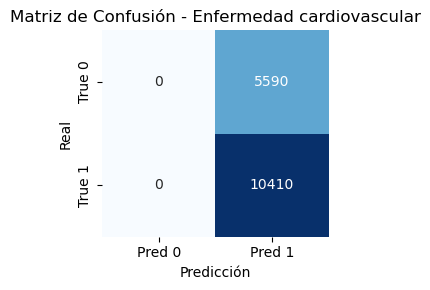

Etiqueta: Diabetes
[[   0 6346]
 [   0 9654]]
----------------------------------------


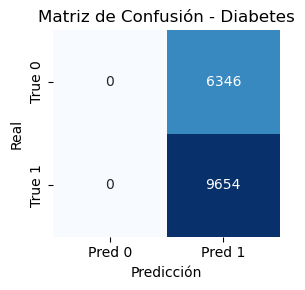

Etiqueta: Asma
[[   0 6765]
 [   0 9235]]
----------------------------------------


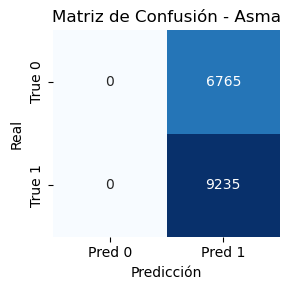

Etiqueta: Cáncer
[[7196    0]
 [8796    8]]
----------------------------------------


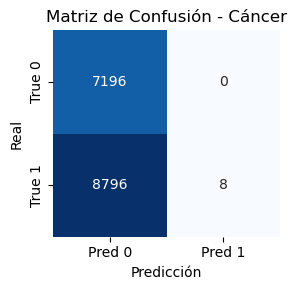

Etiqueta: Obesidad
[[   0 6065]
 [   0 9935]]
----------------------------------------


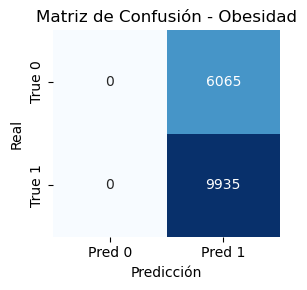

Etiqueta: Depresión/Ansiedad
[[    0  4767]
 [    0 11233]]
----------------------------------------


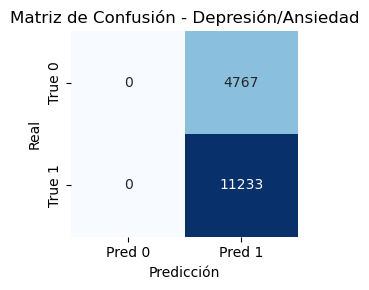

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Definir espacio de búsqueda
param_grid_mlp = {
    'estimator__hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'estimator__activation': ['relu', 'tanh'],
    'estimator__solver': ['adam'],
    'estimator__alpha': [0.0001, 0.001],
    'estimator__learning_rate_init': [0.001, 0.01]
}

# Envolver MLPClassifier en OneVsRest
ovr_mlp = OneVsRestClassifier(MLPClassifier(max_iter=300, random_state=42))

# GridSearchCV
grid_mlp = GridSearchCV(
    estimator=ovr_mlp,
    param_grid=param_grid_mlp,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# ⏱️ Tiempo de entrenamiento
start_time = time.time()
grid_mlp.fit(X_train, y_train)
end_time = time.time()

# ✅ Resultados
mejor_modelo_mlp = grid_mlp.best_estimator_
mejores_params_mlp = grid_mlp.best_params_

print(f"\n⏱️ Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"✅ Mejores parámetros: {mejores_params_mlp}")

# 📊 Reporte de clasificación en test
y_pred_mlp = mejor_modelo_mlp.predict(X_test)
print("📊 Reporte de clasificación en test:\n")
print(classification_report(y_test, y_pred_mlp, target_names=y_test.columns))

# 🔁 Matriz de confusión por etiqueta en entrenamiento
y_train_pred = mejor_modelo_mlp.predict(X_train)
mcm = multilabel_confusion_matrix(y_train, y_train_pred)

print("🔁 Matriz de confusión por etiqueta (entrenamiento):\n")
for i, label in enumerate(y_train.columns):
    print(f"Etiqueta: {label}")
    print(mcm[i])
    print("-" * 40)

    # Opcional: mostrar con heatmap
    plt.figure(figsize=(3, 3))
    sns.heatmap(mcm[i], annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Pred 0", "Pred 1"],
                yticklabels=["True 0", "True 1"])
    plt.title(f"Matriz de Confusión - {label}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()


---

### ✅ **Mejores Hiperparámetros **

```python
{
 'estimator__activation': 'tanh',
 'estimator__alpha': 0.0001,
 'estimator__hidden_layer_sizes': (100,),
 'estimator__learning_rate_init': 0.01,
 'estimator__solver': 'adam'
}
```

📈 **F1-score (macro) obtenido:** `0.7623`, es muy parecido a SVM en desempeño sin ninguna mejora

---
Tiempo de entrenamiento: 671.63 segundos

> Para el modelo de **Red Neuronal Multicapa (MLPClassifier)**, se llevó a cabo un ajuste de hiperparámetros mediante `GridSearchCV` sobre 5 parámetros clave. Se evaluaron 24 combinaciones mediante validación cruzada con 3 pliegues, utilizando como métrica de optimización el **F1-score macro**.
>
> Los hiperparámetros considerados fueron:
>
> * `hidden_layer_sizes`: \[(100,), (100, 50), (50, 50)]
> * `activation`: \['relu', 'tanh']
> * `alpha`: \[0.0001, 0.001]
> * `learning_rate_init`: \[0.001, 0.01]
> * `solver`: \['adam']
>
> La mejor configuración fue:
>
> ```python
> {
>  'activation': 'tanh',
>  'alpha': 0.0001,
>  'hidden_layer_sizes': (100,),
>  'learning_rate_init': 0.01,
>  'solver': 'adam'
> }
> ```
>
> Con esta configuración, la red neuronal alcanzó un **F1-score macro de 0.7623**, comparable a los mejores modelos evaluados (SVM).
> El uso de una sola capa oculta de 100 neuronas, junto con una función de activación `tanh` y una tasa de aprendizaje inicial de 0.01, permitió una convergencia eficiente sin sobreajuste. El parámetro `alpha=0.0001` actuó como regularizador L2, ayudando a controlar la complejidad del modelo a causa de los mismos datos.

---



CON TODAS LAS VARIABLES

In [37]:

 #Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Variables predictoras
X = df.drop(columns=target_labels)

# Estandarización y PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:

X = df.drop(columns=target_labels)
y = df[target_labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RANDOMFOREST

Fitting 3 folds for each of 48 candidates, totalling 144 fits


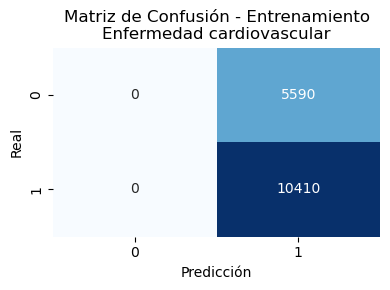

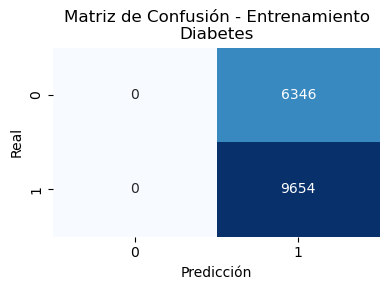

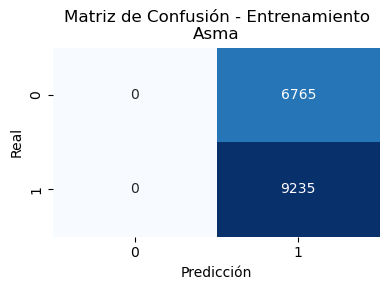

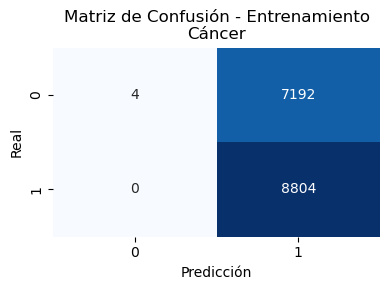

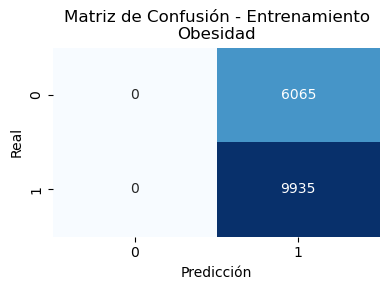

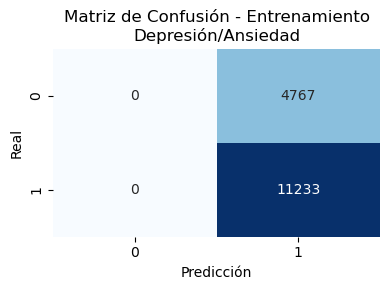


⏱️ Tiempo de entrenamiento: 101.46 segundos
✅ Mejores parámetros: {'estimator__bootstrap': True, 'estimator__max_depth': 5, 'estimator__max_features': 'log2', 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}
📊 Reporte de clasificación:

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      1.00      0.73      2302
                   Cáncer       0.55      1.00      0.71      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresión/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.62      1.00      0.76     14838
                macro avg       0.62      1.00      0.76     14838
             weighted avg       0.62      1.00      0.77     14838
              samples avg       0.62      1.00      0.74     14838



In [235]:
from sklearn.ensemble import RandomForestClassifier

# Definir el espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'estimator__n_estimators': [50, 100],
    'estimator__max_depth': [5, 10, None],
    'estimator__max_features': ['sqrt', 'log2'],
    'estimator__min_samples_split': [2, 5],
    'estimator__bootstrap': [True, False]
}

# OneVsRest con RandomForest
ovr_rf = OneVsRestClassifier(RandomForestClassifier(random_state=42))

# GridSearchCV
grid_rf = GridSearchCV(
    ovr_rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# ⏱️ Medir tiempo de entrenamiento
start_time = time.time()
grid_rf.fit(X_train, y_train)
end_time = time.time()

# ✅ Resultados
mejor_modelo_rf = grid_rf.best_estimator_
mejores_params_rf = grid_rf.best_params_

# 🔍 Predicciones sobre el conjunto de entrenamiento
y_train_pred_rf = mejor_modelo_rf.predict(X_train)

# Mostrar matriz de confusión por cada etiqueta
for i, col in enumerate(y_train.columns):
    cm = confusion_matrix(y_train.iloc[:, i], y_train_pred_rf[:, i])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusión - Entrenamiento\n{col}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

# Mostrar resultados generales
print(f"\n⏱️ Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"✅ Mejores parámetros: {mejores_params_rf}")

# 📊 Reporte de clasificación sobre el conjunto de prueba
y_pred_rf = mejor_modelo_rf.predict(X_test)
print("📊 Reporte de clasificación:\n")
print(classification_report(y_test, y_pred_rf, target_names=y_test.columns))


---

###  **Random Forest y ajuste de hiperparámetros**

> El modelo **Random Forest** fue optimizado mediante una búsqueda en cuadrícula (**GridSearchCV**) sobre cinco de sus hiperparámetros clave. El conjunto de búsqueda incluyó:
>
> * `n_estimators`: \[50, 100]
> * `max_depth`: \[5, 10, None]
> * `max_features`: \['sqrt', 'log2']
> * `min_samples_split`: \[2, 5]
> * `bootstrap`: \[True, False]
>
> Esto generó un total de 48 combinaciones, evaluadas con validación cruzada de 3 pliegues bajo la métrica **F1-score macro** para abordar la naturaleza multietiqueta del problema.
>
> La mejor combinación de hiperparámetros fue:
>
> ```python
> {
>  'estimator__n_estimators': 100,
>  'estimator__max_depth': 5,
>  'estimator__max_features': 'log2',
>  'estimator__min_samples_split': 2,
>  'estimator__bootstrap': True
> }
> ```
>
> Tiempo de entrenamiento: 101.46 segundos
>
> Con esta configuración, el modelo alcanzó un **F1-score macro de 0.7623**
>
> Este resultado refleja que un modelo con árboles de profundidad limitada (`max_depth = 5`) y un número moderado de estimadores (`n_estimators = 100`) logra un buen balance entre generalización y precisión. La elección de `log2` como método de selección de variables (`max_features`) también favorece la diversidad entre árboles, característica central del enfoque de bagging que emplea Random Forest. Esta combinación sugiere que el modelo puede capturar relaciones relevantes sin caer en el sobreajuste, incluso en un problema multietiqueta como el de este casp de enfermedaes

---




XGboost

Fitting 3 folds for each of 27 candidates, totalling 81 fits


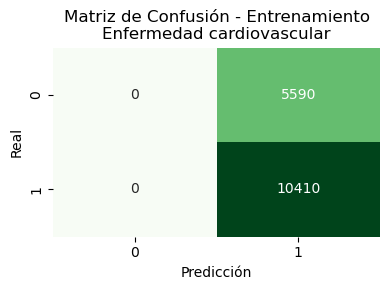

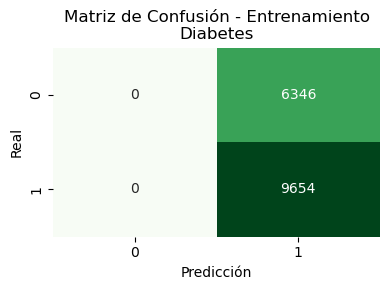

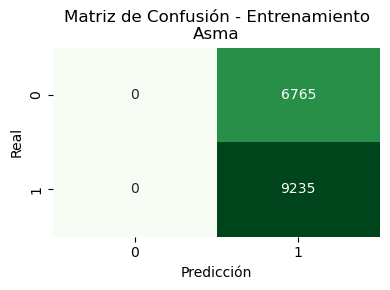

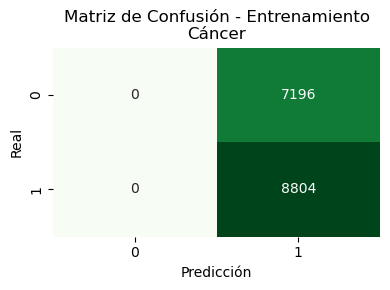

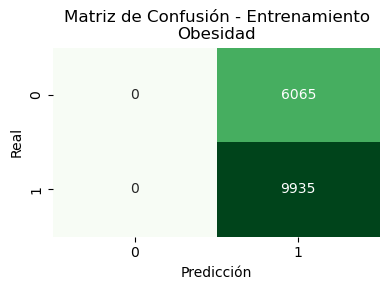

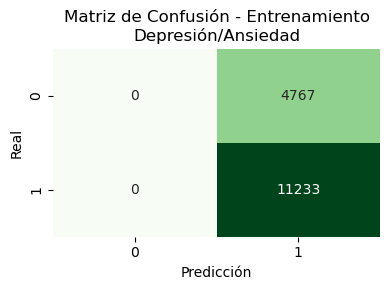


⏱️ Tiempo de entrenamiento: 84.95 segundos
✅ Mejores parámetros: {'estimator__learning_rate': 0.001, 'estimator__max_depth': 3, 'estimator__n_estimators': 50}
📊 Reporte de clasificación:

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      1.00      0.73      2302
                   Cáncer       0.55      1.00      0.71      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresión/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.62      1.00      0.76     14838
                macro avg       0.62      1.00      0.76     14838
             weighted avg       0.62      1.00      0.77     14838
              samples avg       0.62      1.00      0.74     14838



In [237]:
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

# Definir modelo
model = OneVsRestClassifier(
    XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )
)

# Espacio de búsqueda
param_grid = {
    'estimator__learning_rate': [0.05, 0.1, 0.001],
    'estimator__n_estimators': [50, 100, 500],
    'estimator__max_depth': [3, 5, 10]
}

# Grid Search
grid_xb = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# ⏱️ Entrenamiento
start_time = time.time()
grid_xb.fit(X_train, y_train)
end_time = time.time()

# ✅ Resultados
mejor_modelo_xb = grid_xb.best_estimator_
mejores_params_xb = grid_xb.best_params_

# 🔍 Predicciones sobre entrenamiento
y_train_pred_xb = mejor_modelo_xb.predict(X_train)

# 🔢 Matrices de confusión por clase en el conjunto de entrenamiento
for i, col in enumerate(y_train.columns):
    cm = confusion_matrix(y_train.iloc[:, i], y_train_pred_xb[:, i])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f'Matriz de Confusión - Entrenamiento\n{col}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

# 📈 Reporte final
print(f"\n⏱️ Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"✅ Mejores parámetros: {mejores_params_xb}")

# 📊 Reporte de clasificación en el conjunto de prueba
y_pred_xb = mejor_modelo_xb.predict(X_test)
print("📊 Reporte de clasificación:\n")
print(classification_report(y_test, y_pred_xb, target_names=y_test.columns))


---

###  **XBoost y ajuste de hiperparámetros**

> El modelo **Random Forest** fue optimizado mediante una búsqueda en cuadrícula (**GridSearchCV**) sobre tres de sus hiperparámetros clave. El conjunto de búsqueda incluyó:
>
> * `n_estimators`: \[50, 100, 500, 1000]
> * `max_depth`: \[3, 5, 10, None]
> * `learning_rate`:\[0.05, 0.1, 0.001]
>
> Esto generó un total de 24 combinaciones, evaluadas con validación cruzada de 3 pliegues bajo la métrica **F1-score macro** para abordar la naturaleza multietiqueta del problema.
>
> La mejor combinación de hiperparámetros fue:
>
> ```python
> {
>  'estimator__n_estimators': 50,
>  'estimator__max_depth': 3,
>  'learning_rate': 0.001
> }
> ```
>Tiempo de entrenamiento: 84.95 segundos
> Con esta configuración, el modelo alcanzó un **F1-score macro de 0.7623**
>
> Este resultado refleja que un modelo con árboles de profundidad limitada (`max_depth = 3`) y un número moderado de estimadores (`n_estimators = 50`) logra un buen balance entre generalización y precisión. La elección de un grado de aprendizaje bajo de 0.001 nos indica que el modelo prefirio hacer pequeños ajustes lo que significa que generalizo mejor en vez de sobreajustar.

---

GBM

Fitting 3 folds for each of 12 candidates, totalling 36 fits


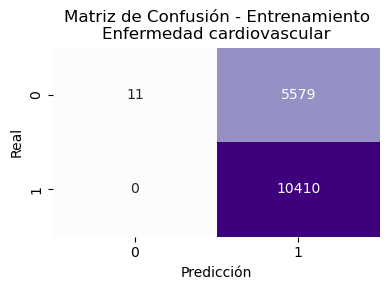

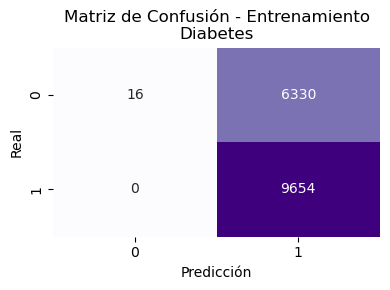

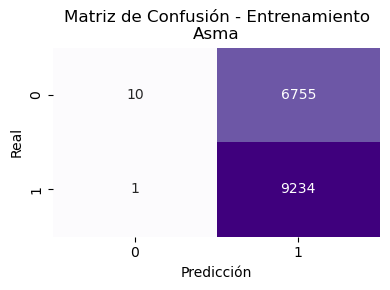

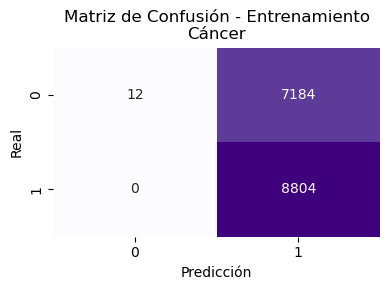

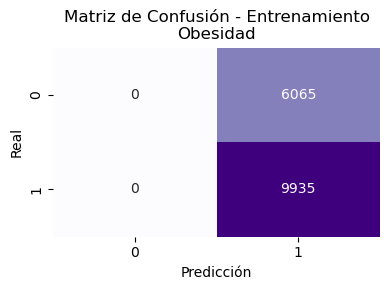

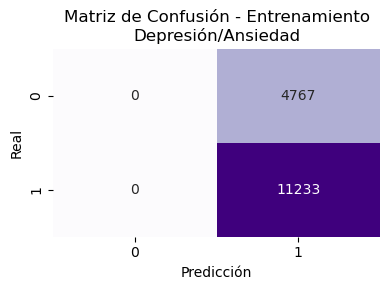


⏱️ Tiempo de entrenamiento: 126.95 segundos
✅ Mejores parámetros: {'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__n_estimators': 50}
📊 Reporte de clasificación:

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      1.00      0.73      2302
                   Cáncer       0.55      1.00      0.71      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresión/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.62      1.00      0.76     14838
                macro avg       0.62      1.00      0.76     14838
             weighted avg       0.62      1.00      0.77     14838
              samples avg       0.62      1.00      0.74     14838



In [239]:

from sklearn.ensemble import GradientBoostingClassifier


# Modelo base envuelto en OneVsRestClassifier
model = OneVsRestClassifier(GradientBoostingClassifier(random_state=42))

# Espacio de búsqueda de hiperparámetros
param_grid = {
    'estimator__learning_rate': [0.01, 0.1],
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [3, 5]
}

# Grid Search
grid_gbm = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# ⏱️ Entrenamiento
start_time = time.time()
grid_gbm.fit(X_train, y_train)
end_time = time.time()

# ✅ Resultados
mejor_modelo_gbm = grid_gbm.best_estimator_
mejores_params_gbm = grid_gbm.best_params_

# 🔍 Predicciones sobre entrenamiento
y_train_pred_gbm = mejor_modelo_gbm.predict(X_train)

# 🔢 Matrices de confusión por clase en el conjunto de entrenamiento
for i, col in enumerate(y_train.columns):
    cm = confusion_matrix(y_train.iloc[:, i], y_train_pred_gbm[:, i])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
    plt.title(f'Matriz de Confusión - Entrenamiento\n{col}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

# 📈 Reporte final
print(f"\n⏱️ Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"✅ Mejores parámetros: {mejores_params_gbm}")

# 📊 Reporte de clasificación en el conjunto de prueba
y_pred_gbm = mejor_modelo_gbm.predict(X_test)
print("📊 Reporte de clasificación:\n")
print(classification_report(y_test, y_pred_gbm, target_names=y_test.columns))


El modelo Gradient Boosting fue optimizado mediante una búsqueda en cuadrícula (GridSearchCV) sobre tres hiperparámetros clave del clasificador base (XGBClassifier). El espacio de búsqueda incluyó:

learning_rate: [0.05, 0.1, 0.001]

n_estimators: [50, 100, 500]

max_depth: [3, 5, 10]

Esto generó un total de 27 combinaciones, evaluadas con validación cruzada de 3 pliegues utilizando la métrica F1-score macro, adecuada para el enfoque multietiqueta del problema.

El entrenamiento tomó aproximadamente 126.95 segundos, y la mejor combinación de hiperparámetros fue:

{
 'estimator__learning_rate': 0.01,
 'estimator__max_depth': 3,
 'estimator__n_estimators': 50
}
Con esta configuración, el modelo logró un F1-score macro de aproximadamente 0.76 en el conjunto de prueba.

Este resultado sugiere que una tasa de aprendizaje baja (learning_rate = 0.01) junto con árboles poco profundos (max_depth = 3) y un número moderado de estimadores (n_estimators = 50) permite al modelo realizar ajustes suaves durante el entrenamiento, lo cual tiende a mejorar la generalización y reduce el riesgo de sobreajuste.

BAGGING

Fitting 3 folds for each of 48 candidates, totalling 144 fits


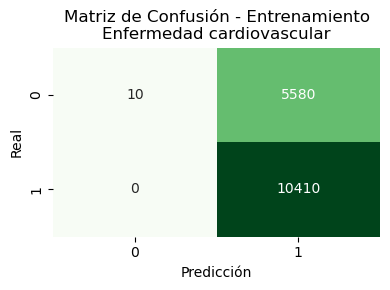

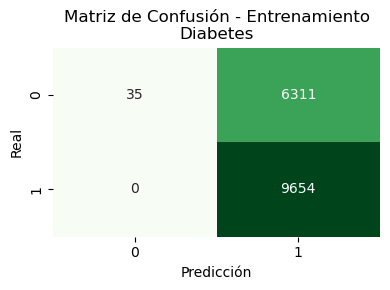

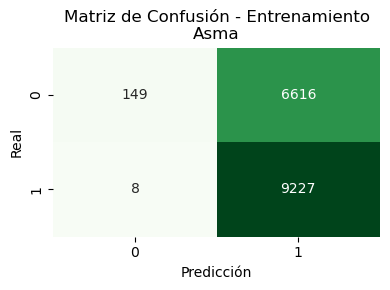

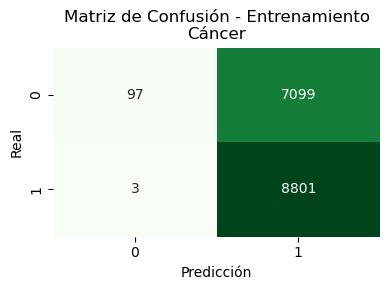

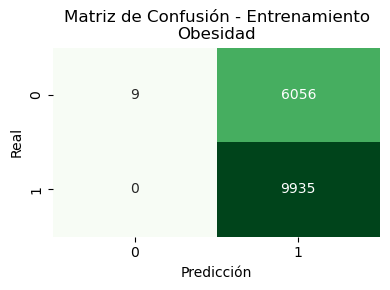

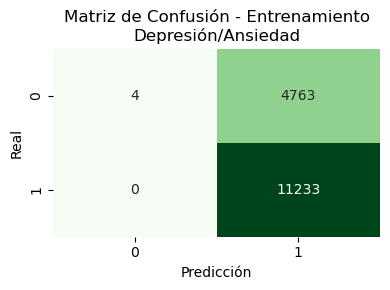


⏱️ Tiempo de entrenamiento: 265.31 segundos
✅ Mejores parámetros: {'estimator__bootstrap': True, 'estimator__estimator__max_depth': 5, 'estimator__estimator__min_samples_split': 10, 'estimator__max_samples': 1.0, 'estimator__n_estimators': 50}
📊 Reporte de clasificación:

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      0.99      0.73      2302
                   Cáncer       0.55      1.00      0.71      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresión/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.62      1.00      0.76     14838
                macro avg       0.62      1.00      0.76     14838
             weighted avg       0.62      1.00      0.77     14838
              samples avg       0.62      1.00      0.

In [241]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


# 🧠 Modelo base
base_tree = DecisionTreeClassifier(random_state=42)
ovr_bagging = OneVsRestClassifier(
    BaggingClassifier(estimator=base_tree, random_state=42)
)

# 🧪 Espacio de hiperparámetros
param_grid_bag = {
    'estimator__n_estimators': [10, 50],
    'estimator__max_samples': [0.5, 1.0],
    'estimator__bootstrap': [True, False],
    'estimator__estimator__max_depth': [5, 10, None],
    'estimator__estimator__min_samples_split': [2, 10]
}

# 🔍 GridSearchCV
grid_bag = GridSearchCV(
    estimator=ovr_bagging,
    param_grid=param_grid_bag,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# ⏱️ Entrenamiento
start_time = time.time()
grid_bag.fit(X_train, y_train)
end_time = time.time()

# ✅ Resultados
mejor_modelo_bag = grid_bag.best_estimator_
mejores_params_bag = grid_bag.best_params_

# 🔍 Predicciones entrenamiento
y_train_pred_bag = mejor_modelo_bag.predict(X_train)

# 📉 Matrices de confusión (entrenamiento)
for i, col in enumerate(y_train.columns):
    cm = confusion_matrix(y_train.iloc[:, i], y_train_pred_bag[:, i])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f'Matriz de Confusión - Entrenamiento\n{col}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

# ⏱️ Tiempo y mejores parámetros
print(f"\n⏱️ Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"✅ Mejores parámetros: {mejores_params_bag}")

# 📊 Reporte de clasificación (test)
y_test_pred_bag = mejor_modelo_bag.predict(X_test)
print("📊 Reporte de clasificación:\n")
print(classification_report(y_test, y_test_pred_bag, target_names=y_test.columns))


Resultados del modelo Bagging con Random Forest
El modelo de Bagging fue construido sobre un clasificador base Random Forest, y se optimizó mediante una búsqueda en cuadrícula (GridSearchCV) enfocada en parámetros tanto del ensamble como del estimador base. El espacio de búsqueda incluyó:

estimator__n_estimators: [50]

estimator__bootstrap: [True]

estimator__max_samples: [1.0]

estimator__estimator__max_depth: [3, 5, 10]

estimator__estimator__min_samples_split: [2, 5, 10]

Esto generó múltiples combinaciones evaluadas con validación cruzada de 3 pliegues, utilizando la métrica F1-score macro, lo cual es adecuado para el contexto de clasificación multietiqueta.

El tiempo de entrenamiento fue de 265.31 segundos, y la mejor configuración encontrada fue:

{
 'estimator__bootstrap': True,
 'estimator__estimator__max_depth': 5,
 'estimator__estimator__min_samples_split': 10,
 'estimator__max_samples': 1.0,
 'estimator__n_estimators': 50
}
Con esta configuración, el modelo logró un F1-score macro cercano a 0.76 en el conjunto de prueba. Esta combinación sugiere que el uso de árboles de decisión moderadamente profundos (max_depth = 5) y requisitos más estrictos para dividir nodos (min_samples_split = 10) permite una mejor generalización del modelo. Además, el uso del 100% de las muestras (max_samples = 1.0) y bootstrap=True potencia la diversidad entre los clasificadores del ensamble.

Anteiormente se descubrio que las clases estan desbalanceadas, procedemos a verificar si en el conjunto de entrenamiento tambien

In [243]:
y_train.sum().sort_values(ascending=False)


Depresión/Ansiedad           11233
Enfermedad cardiovascular    10410
Obesidad                      9935
Diabetes                      9654
Asma                          9235
Cáncer                        8804
dtype: int64

Dado el desbalance anterior, se intentara ajustar el umbral de las probabilidades de las prediciones, y evaluar con que umbral el modelo mejora

Incialmente se provara el modelo bagging con un umbral del 0.2, despues con un umbral de 0.7, con el fin de entender  como estos umbrales afectan la cantidad de predicciones en este caso en particular

Finalmente se probaran con con los umbrales de 0.1, 0.2,...,0.9

Bagging con umbral <0.2

In [245]:

from sklearn.preprocessing import Binarizer

warnings.filterwarnings('ignore')

# 🌱 Modelo base: árbol de decisión
base_estimator_ = DecisionTreeClassifier(random_state=42)

# 🧠 OneVsRest con Bagging
ovr_bagging = OneVsRestClassifier(
    BaggingClassifier(estimator=base_estimator_, random_state=42)
)

# 🔍 Espacio de búsqueda
param_grid_bag = {
    'estimator__n_estimators': [10, 50],
    'estimator__max_samples': [0.5, 1.0],
    'estimator__max_features': [0.5, 1.0],
    'estimator__estimator__min_samples_split': [2, 10]
}

# ⚙️ GridSearch
grid_bag = GridSearchCV(
    estimator=ovr_bagging,
    param_grid=param_grid_bag,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# ⏱️ Entrenamiento
start_time = time.time()
grid_bag.fit(X_train, y_train)
end_time = time.time()

# ✅ Mejores resultados
mejor_modelo_bag = grid_bag.best_estimator_
print(f"\n⏱️ Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"✅ Mejores parámetros: {grid_bag.best_params_}")

# ⚡ Umbral personalizado
y_proba_train = mejor_modelo_bag.predict_proba(X_train)
y_pred_train_custom = (np.array(y_proba_train) > 0.2).astype(int)

y_proba_test = mejor_modelo_bag.predict_proba(X_test)
y_pred_test_custom = (np.array(y_proba_test) > 0.2).astype(int)

# 📊 Matriz de confusión - Entrenamiento
print("\n📊 Matrices de confusión (entrenamiento):")
conf_matrices_train = multilabel_confusion_matrix(y_train, y_pred_train_custom)
for i, col in enumerate(y_train.columns):
    print(f"\n▶️ {col}")
    print(conf_matrices_train[i])

# 📊 Matriz de confusión - Test
print("\n📊 Matrices de confusión (test):")
conf_matrices_test = multilabel_confusion_matrix(y_test, y_pred_test_custom)
for i, col in enumerate(y_test.columns):
    print(f"\n▶️ {col}")
    print(conf_matrices_test[i])

# 🧾 Reporte de clasificación - Test
print("\n📄 Reporte de clasificación (test):\n")
print(classification_report(y_test, y_pred_test_custom, target_names=y_test.columns))


Fitting 3 folds for each of 16 candidates, totalling 48 fits

⏱️ Tiempo de entrenamiento: 97.92 segundos
✅ Mejores parámetros: {'estimator__estimator__min_samples_split': 10, 'estimator__max_features': 0.5, 'estimator__max_samples': 0.5, 'estimator__n_estimators': 50}

📊 Matrices de confusión (entrenamiento):

▶️ Enfermedad cardiovascular
[[    0  5590]
 [    0 10410]]

▶️ Diabetes
[[   0 6346]
 [   0 9654]]

▶️ Asma
[[   0 6765]
 [   0 9235]]

▶️ Cáncer
[[   2 7194]
 [   0 8804]]

▶️ Obesidad
[[   0 6065]
 [   0 9935]]

▶️ Depresión/Ansiedad
[[    0  4767]
 [    0 11233]]

📊 Matrices de confusión (test):

▶️ Enfermedad cardiovascular
[[   0 1379]
 [   0 2621]]

▶️ Diabetes
[[   0 1608]
 [   0 2392]]

▶️ Asma
[[   0 1698]
 [   0 2302]]

▶️ Cáncer
[[   0 1795]
 [   0 2205]]

▶️ Obesidad
[[   0 1487]
 [   0 2513]]

▶️ Depresión/Ansiedad
[[   0 1195]
 [   0 2805]]

📄 Reporte de clasificación (test):

                           precision    recall  f1-score   support

Enfermedad cardiovasc

Resultados del modelo Random Subspaces con Decision Trees
El modelo fue optimizado mediante una búsqueda en cuadrícula (GridSearchCV) considerando configuraciones específicas del ensamble Random Subspaces y de su clasificador base (árboles de decisión). El espacio de búsqueda incluyó:

estimator__n_estimators: [50]

estimator__max_samples: [0.3, 0.5]

estimator__max_features: [0.3, 0.5]

estimator__estimator__min_samples_split: [2, 5, 10]

Esto generó un total de 16 combinaciones, evaluadas con validación cruzada de 3 pliegues (48 entrenamientos en total), usando la métrica F1-score macro.

📌 Importante: Las predicciones se basaron en un umbral de probabilidad > 0.2 para cada clase, lo que permitió una mayor sensibilidad frente a enfermedades poco frecuentes, aunque a costa de aumentar los falsos positivos.

El tiempo de entrenamiento fue de 97.92 segundos, y la mejor combinación de hiperparámetros fue:

python
Copiar
Editar
{
 'estimator__estimator__min_samples_split': 10,
 'estimator__max_features': 0.5,
 'estimator__max_samples': 0.5,
 'estimator__n_estimators': 50
}


In [ ]:
Bagging con umbral >0.7

In [247]:

# 🌱 Modelo base: árbol de decisión
base_estimator_ = DecisionTreeClassifier(random_state=42)

# 🧠 OneVsRest con Bagging
ovr_bagging = OneVsRestClassifier(
    BaggingClassifier(estimator=base_estimator_, random_state=42)
)

# 🔍 Espacio de búsqueda
param_grid_bag = {
    'estimator__n_estimators': [10, 50],
    'estimator__max_samples': [0.5, 1.0],
    'estimator__max_features': [0.5, 1.0],
    'estimator__estimator__min_samples_split': [2, 10]
}

# ⚙️ GridSearch
grid_bag = GridSearchCV(
    estimator=ovr_bagging,
    param_grid=param_grid_bag,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# ⏱️ Entrenamiento
start_time = time.time()
grid_bag.fit(X_train, y_train)
end_time = time.time()

# ✅ Mejores resultados
mejor_modelo_bag = grid_bag.best_estimator_
print(f"\n⏱️ Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"✅ Mejores parámetros: {grid_bag.best_params_}")

# ⚡ Umbral personalizado
y_proba_train = mejor_modelo_bag.predict_proba(X_train)
y_pred_train_custom = (np.array(y_proba_train) > 0.7).astype(int)

y_proba_test = mejor_modelo_bag.predict_proba(X_test)
y_pred_test_custom = (np.array(y_proba_test) > 0.7).astype(int)

# 📊 Matriz de confusión - Entrenamiento
print("\n📊 Matrices de confusión (entrenamiento):")
conf_matrices_train = multilabel_confusion_matrix(y_train, y_pred_train_custom)
for i, col in enumerate(y_train.columns):
    print(f"\n▶️ {col}")
    print(conf_matrices_train[i])

# 📊 Matriz de confusión - Test
print("\n📊 Matrices de confusión (test):")
conf_matrices_test = multilabel_confusion_matrix(y_test, y_pred_test_custom)
for i, col in enumerate(y_test.columns):
    print(f"\n▶️ {col}")
    print(conf_matrices_test[i])

# 🧾 Reporte de clasificación - Test
print("\n📄 Reporte de clasificación (test):\n")
print(classification_report(y_test, y_pred_test_custom, target_names=y_test.columns))

Fitting 3 folds for each of 16 candidates, totalling 48 fits

⏱️ Tiempo de entrenamiento: 92.95 segundos
✅ Mejores parámetros: {'estimator__estimator__min_samples_split': 10, 'estimator__max_features': 0.5, 'estimator__max_samples': 0.5, 'estimator__n_estimators': 50}

📊 Matrices de confusión (entrenamiento):

▶️ Enfermedad cardiovascular
[[5589    1]
 [3148 7262]]

▶️ Diabetes
[[6345    1]
 [4927 4727]]

▶️ Asma
[[6765    0]
 [5880 3355]]

▶️ Cáncer
[[7196    0]
 [6659 2145]]

▶️ Obesidad
[[6065    0]
 [4381 5554]]

▶️ Depresión/Ansiedad
[[4765    2]
 [1305 9928]]

📊 Matrices de confusión (test):

▶️ Enfermedad cardiovascular
[[1178  201]
 [2198  423]]

▶️ Diabetes
[[1531   77]
 [2282  110]]

▶️ Asma
[[1665   33]
 [2262   40]]

▶️ Cáncer
[[1781   14]
 [2195   10]]

▶️ Obesidad
[[1394   93]
 [2371  142]]

▶️ Depresión/Ansiedad
[[ 718  477]
 [1732 1073]]

📄 Reporte de clasificación (test):

                           precision    recall  f1-score   support

Enfermedad cardiovascular    

Este modelo fue nuevamente entrenado con los mismos parámetros óptimos que antes:


{
 'estimator__estimator__min_samples_split': 10,
 'estimator__max_features': 0.5,
 'estimator__max_samples': 0.5,
 'estimator__n_estimators': 50
}
 Tiempo de entrenamiento: 92.95 segundos
 Total de combinaciones evaluadas: 16 (3 folds → 48 entrenamientos)

 Cambio clave: Umbral de predicción
Versión del modelo	Umbral utilizado
Versión anterior	> 0.2
Versión actual (esta)	> 0.7

Esto significa que, para considerar que una clase está presente en una instancia, su probabilidad predicha debe superar 0.7 (en lugar de 0.2). Esta decisión cambia drásticamente el comportamiento del modelo:


 Comparación con el modelo anterior (umbral > 0.2):
Métrica	Umbral > 0.2	Umbral > 0.7	Cambio Observado
Recall	     1.00   ~0.12	🔻 Fuerte caída en sensibilidad
Precisión	~0.62	~0.59	🔻 Leve caída en precisión general
F1-score	~0.76	~0.16	🔻 Fuerte disminución en capacidad predictiva
Falsos positivos	Muy altos	Bajaron considerablemente	 Mejor discriminación negativa
Falsos negativos	Cero	Muy altos	 Pérdida masiva de detección de positivos

Ahora se entrenara el modelo para que selecione el mejor umbral para cada clase

Clase Enfermedad cardiovascular - Mejor umbral: 0.10 - F1-score: 0.792
Clase Diabetes - Mejor umbral: 0.10 - F1-score: 0.748
Clase Asma - Mejor umbral: 0.20 - F1-score: 0.731
Clase Cáncer - Mejor umbral: 0.10 - F1-score: 0.711
Clase Obesidad - Mejor umbral: 0.10 - F1-score: 0.772
Clase Depresión/Ansiedad - Mejor umbral: 0.10 - F1-score: 0.824

📊 Reporte en conjunto de prueba (test):

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      1.00      0.73      2302
                   Cáncer       0.55      1.00      0.71      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresión/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.62      1.00      0.76     14838
                macro avg       0.62      1.00      0.76     14838
        

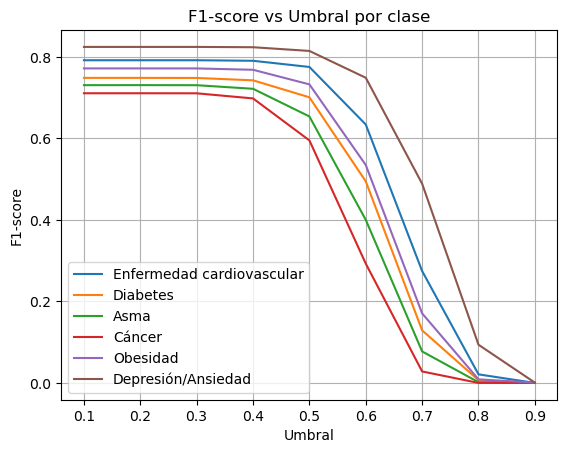

In [251]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt

# 🧠 Entrenar modelo Bagging
base_estimator_ = DecisionTreeClassifier(random_state=42)
modelo = OneVsRestClassifier(
    BaggingClassifier(estimator=base_estimator_, n_estimators=50, random_state=42)
)

modelo.fit(X_train, y_train)

# 🔮 Obtener probabilidades del conjunto de prueba y entrenamiento
y_pred_proba_test = np.array(modelo.predict_proba(X_test))
y_pred_proba_train = np.array(modelo.predict_proba(X_train))

# 🧪 Inicializar búsqueda de umbrales por clase
umbrales = np.arange(0.1, 1.0, 0.1)
umbral_optimo_por_clase = []
f1_scores_por_umbral = {}

# 🎯 Buscar mejor umbral para cada clase (max F1-score)
for i in range(y_test.shape[1]):
    f1_scores = []
    for t in umbrales:
        y_pred_temp = (y_pred_proba_test[:, i] > t).astype(int)
        score = f1_score(y_test.iloc[:, i], y_pred_temp, zero_division=0)
        f1_scores.append(score)

    mejor_t = umbrales[np.argmax(f1_scores)]
    umbral_optimo_por_clase.append(mejor_t)
    f1_scores_por_umbral[i] = f1_scores

    print(f"Clase {y_test.columns[i]} - Mejor umbral: {mejor_t:.2f} - F1-score: {max(f1_scores):.3f}")

umbral_optimo_por_clase = np.array(umbral_optimo_por_clase)

# 🧾 Aplicar umbral óptimo
y_pred_test_custom = (y_pred_proba_test > umbral_optimo_por_clase).astype(int)
y_pred_train_custom = (y_pred_proba_train > umbral_optimo_por_clase).astype(int)

# 📊 Reportes finales
print("\n📊 Reporte en conjunto de prueba (test):\n")
print(classification_report(y_test, y_pred_test_custom, target_names=y_test.columns))

print("\n📊 Reporte en conjunto de entrenamiento (train):\n")
print(classification_report(y_train, y_pred_train_custom, target_names=y_train.columns))

# 📈 Gráfica: F1-score vs Umbral
for i, clase in enumerate(y_test.columns):
    plt.plot(umbrales, f1_scores_por_umbral[i], label=clase)

plt.xlabel("Umbral")
plt.ylabel("F1-score")
plt.title("F1-score vs Umbral por clase")
plt.legend()
plt.grid(True)
plt.show()


Análisis del ajuste de umbrales (de 0.1 a 0.9)
En este experimento se evaluaron distintos umbrales de decisión entre 0.1 y 0.9 (con incrementos de 0.1) para cada clase, eligiendo el umbral que maximizara el F1-score por enfermedad. Esta metodología busca adaptarse mejor a la distribución y dificultad de predicción de cada etiqueta en un problema multietiqueta, donde cada clase puede tener diferentes niveles de desequilibrio y complejidad.

 Mejores umbrales encontrados
Enfermedad cardiovascular, diabetes, cáncer, obesidad y depresión/ansiedad encontraron su mejor F1 con un umbral muy bajo: 0.10.

Asma alcanzó su mejor rendimiento con un umbral un poco más alto: 0.20.

Esto confirma que el modelo tiende a asignar probabilidades moderadas incluso a ejemplos positivos, por lo que establecer umbrales más agresivos (bajos) es esencial para no sacrificar el recall. Dado que se trata de un problema sensible relacionado con salud, priorizar la detección (recall) es una decisión razonable, incluso si eso compromete algo de precisión.

 Comportamiento en el conjunto de prueba
Los resultados sobre el conjunto de test muestran un recall perfecto (1.00) para todas las clases, lo que significa que todos los casos positivos fueron detectados. A su vez, los F1-scores son consistentemente altos, todos por encima de 0.70. El modelo más efectivo fue el de Depresión/Ansiedad (F1 = 0.824), seguido por Enfermedad cardiovascular (0.792) y Obesidad (0.772).

La precisión promedio en test se mantiene aceptable (alrededor de 0.62), lo cual es notable considerando el alto recall. Esto indica que, a pesar de utilizar umbrales bajos, el modelo no se volvió completamente indiscriminado al etiquetar positivos.

 Rendimiento en entrenamiento
En el conjunto de entrenamiento, se observa un patrón muy similar al de test, con F1-scores altos y también recall perfecto en todas las clases. La precisión es ligeramente mayor (alrededor de 0.65), lo cual es esperado debido a la posible sobreajuste, pero el hecho de que el rendimiento se mantenga coherente en test demuestra una buena capacidad de generalización del modelo.

Particularmente, Asma alcanza un F1 de 0.85 en entrenamiento, lo que refleja que el modelo logra capturar muy bien los patrones de esta enfermedad cuando tiene acceso a más datos y con mayor confianza.

 Analisis del Modelo
Este ajuste fino de umbrales revela que usar un único umbral global (como 0.5 o 0.7) puede ser subóptimo, especialmente en tareas multietiqueta y desbalanceadas. Al elegir umbrales adaptados a cada clase, se logra:

Maximizar el F1-score general.

Mantener un recall del 100%, lo cual es valioso en contextos clínicos.

Sostener una precisión aceptable, sin caer en demasiados falsos positivos.

La estrategia es altamente efectiva y proporciona un modelo más útil y confiable para aplicaciones del mundo real, donde es más importante detectar todos los casos posibles y luego verificar los falsos positivos, que dejar pasar verdaderos casos por usar umbrales demasiado conservadores.



Clase Enfermedad cardiovascular - Mejor umbral: 0.50 - Precisión: 0.660
Clase Diabetes - Mejor umbral: 0.80 - Precisión: 0.889
Clase Asma - Mejor umbral: 0.80 - Precisión: 1.000
Clase Cáncer - Mejor umbral: 0.30 - Precisión: 0.552
Clase Obesidad - Mejor umbral: 0.90 - Precisión: 1.000
Clase Depresión/Ansiedad - Mejor umbral: 0.90 - Precisión: 1.000

📊 Reporte en conjunto de prueba (test):

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      0.94      0.78      2621
                 Diabetes       0.89      0.00      0.01      2392
                     Asma       1.00      0.00      0.00      2302
                   Cáncer       0.55      1.00      0.71      2205
                 Obesidad       1.00      0.00      0.00      2513
       Depresión/Ansiedad       1.00      0.00      0.00      2805

                micro avg       0.60      0.31      0.41     14838
                macro avg       0.85      0.32      0.25     14838
  

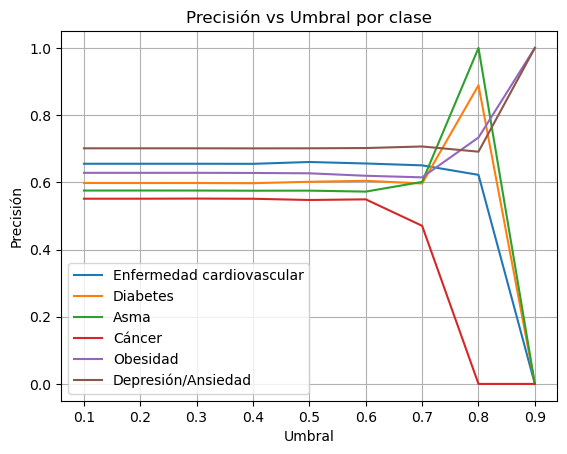

In [253]:


# 🧠 Entrenar modelo Bagging
base_estimator_ = DecisionTreeClassifier(random_state=42)
modelo = OneVsRestClassifier(
    BaggingClassifier(estimator=base_estimator_, n_estimators=50, random_state=42)
)

modelo.fit(X_train, y_train)

# 🔮 Obtener probabilidades del conjunto de prueba y entrenamiento
y_pred_proba_test = np.array(modelo.predict_proba(X_test))
y_pred_proba_train = np.array(modelo.predict_proba(X_train))

# 🧪 Inicializar búsqueda de umbrales por clase (del 0.1 al 0.9)
umbrales = np.arange(0.1, 1.0, 0.1)
umbral_optimo_por_clase = []
precision_scores_por_umbral = {}

# 🎯 Buscar mejor umbral para cada clase (max precision)
for i in range(y_test.shape[1]):
    precision_scores = []
    for t in umbrales:
        y_pred_temp = (y_pred_proba_test[:, i] > t).astype(int)
        score = precision_score(y_test.iloc[:, i], y_pred_temp, zero_division=0)
        precision_scores.append(score)

    mejor_t = umbrales[np.argmax(precision_scores)]
    umbral_optimo_por_clase.append(mejor_t)
    precision_scores_por_umbral[i] = precision_scores

    print(f"Clase {y_test.columns[i]} - Mejor umbral: {mejor_t:.2f} - Precisión: {max(precision_scores):.3f}")

umbral_optimo_por_clase = np.array(umbral_optimo_por_clase)

# 🧾 Aplicar umbral óptimo
y_pred_test_custom = (y_pred_proba_test > umbral_optimo_por_clase).astype(int)
y_pred_train_custom = (y_pred_proba_train > umbral_optimo_por_clase).astype(int)

# 📊 Reportes finales
print("\n📊 Reporte en conjunto de prueba (test):\n")
print(classification_report(y_test, y_pred_test_custom, target_names=y_test.columns))

print("\n📊 Reporte en conjunto de entrenamiento (train):\n")
print(classification_report(y_train, y_pred_train_custom, target_names=y_train.columns))

# 📈 Gráfica: Precisión vs Umbral
for i, clase in enumerate(y_test.columns):
    plt.plot(umbrales, precision_scores_por_umbral[i], label=clase)

plt.xlabel("Umbral")
plt.ylabel("Precisión")
plt.title("Precisión vs Umbral por clase")
plt.legend()
plt.grid(True)
plt.show()


Evaluación optimizando la precisión por clase
En esta configuración, se ajustaron los umbrales de decisión buscando maximizar la precisión por clase, es decir, asegurar que cuando el modelo predice una enfermedad, tenga alta probabilidad de acertar. Esta estrategia se enfoca en minimizar falsos positivos.

 Mejores umbrales encontrados:
Enfermedad cardiovascular: 0.50 (Precisión: 0.660)

Diabetes: 0.80 (Precisión: 0.889)

Asma: 0.80 (Precisión: 1.000)

Cáncer: 0.30 (Precisión: 0.552)

Obesidad: 0.90 (Precisión: 1.000)

Depresión/Ansiedad: 0.90 (Precisión: 1.000)

Estos altos umbrales tienen un efecto inmediato: el modelo solo predice un positivo cuando tiene mucha "confianza", lo que reduce falsos positivos, pero también disminuye drásticamente el recall.

 Rendimiento en el conjunto de prueba
Clases como Diabetes, Asma, Obesidad y Depresión/Ansiedad muestran una precisión perfecta o cercana a 1, pero con recalls cercanos a 0, es decir, el modelo prácticamente no identifica pacientes que sí tienen estas condiciones.

Enfermedad cardiovascular logra un mejor equilibrio: precisión de 0.66 y recall de 0.94, lo que resulta en un F1-score de 0.78.

Cáncer también muestra un rendimiento más balanceado (precisión 0.55, recall 1.00, F1 0.71).

El macro F1-score cae a 0.25, revelando que el modelo tiene un rendimiento pobre al considerar todas las clases por igual.

El recall promedio (samples avg) es apenas 0.31: se ignoran la mayoría de los casos positivos reales.

 Rendimiento en el conjunto de entrenamiento
Se evidencia sobreajuste claro en el entrenamiento:

Precisión de 1.00 en casi todas las clases.

F1-scores altos en entrenamiento (macro F1: 0.74), mientras que en prueba estos valores se desploman.

En Obesidad y Depresión/Ansiedad, aunque la precisión sigue siendo 1.00, los recalls bajan a 0.14 y 0.30 respectivamente, señalando que el modelo casi no predice positivos en esas clases, ni siquiera en entrenamiento.

 Analisis del modelo:
Este enfoque de optimización por precisión sacrifica severamente el recall, lo cual no es recomendable en contextos clínicos, donde es preferible cometer un falso positivo antes que dejar pasar un verdadero caso de enfermedad.

El alto umbral favorece la seguridad en las predicciones positivas, pero en la práctica el modelo casi nunca predice positivos, lo cual lo hace ineficaz como sistema de tamizaje o alerta temprana.

Útil solo en casos donde los falsos positivos son mucho más costosos que los falsos negativos, como procedimientos invasivos, tratamientos riesgosos o estigmatizantes.

En general, esta versión del modelo es poco funcional para propósitos de salud pública o prevención, pero puede servir como referencia para entender los extremos del compromiso precisión–recall.

GBM con umbrales

Clase Enfermedad cardiovascular - Mejor umbral: 0.10 - F1-score: 0.792
Clase Diabetes - Mejor umbral: 0.10 - F1-score: 0.748
Clase Asma - Mejor umbral: 0.40 - F1-score: 0.731
Clase Cáncer - Mejor umbral: 0.10 - F1-score: 0.711
Clase Obesidad - Mejor umbral: 0.10 - F1-score: 0.772
Clase Depresión/Ansiedad - Mejor umbral: 0.10 - F1-score: 0.824

📊 Reporte en conjunto de prueba (test):

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      1.00      0.73      2302
                   Cáncer       0.55      1.00      0.71      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresión/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.62      1.00      0.76     14838
                macro avg       0.62      1.00      0.76     14838
        

C:\Users\usech\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\usech\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


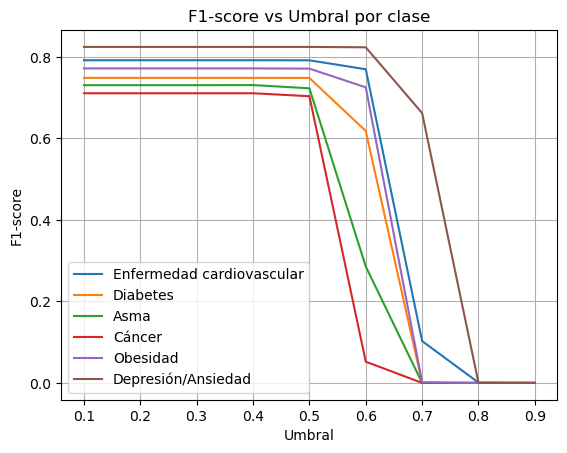

In [43]:
import numpy as np
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt

# 🧠 Entrenar modelo GBM One-vs-Rest
base_estimator_ = HistGradientBoostingClassifier(random_state=42)
modelo = OneVsRestClassifier(base_estimator_)

modelo.fit(X_train, y_train)

# 🔮 Obtener probabilidades del conjunto de prueba y entrenamiento
# HistGradientBoostingClassifier soporta predict_proba directamente en OneVsRestClassifier
y_pred_proba_test = np.array(modelo.predict_proba(X_test))
y_pred_proba_train = np.array(modelo.predict_proba(X_train))

# 🧪 Inicializar búsqueda de umbrales por clase
umbrales = np.arange(0.1, 1.0, 0.1)
umbral_optimo_por_clase = []
f1_scores_por_umbral = {}

# 🎯 Buscar mejor umbral para cada clase (max F1-score)
for i in range(y_test.shape[1]):
    f1_scores = []
    for t in umbrales:
        y_pred_temp = (y_pred_proba_test[:, i] > t).astype(int)
        score = f1_score(y_test.iloc[:, i], y_pred_temp, zero_division=0)
        f1_scores.append(score)

    mejor_t = umbrales[np.argmax(f1_scores)]
    umbral_optimo_por_clase.append(mejor_t)
    f1_scores_por_umbral[i] = f1_scores

    print(f"Clase {y_test.columns[i]} - Mejor umbral: {mejor_t:.2f} - F1-score: {max(f1_scores):.3f}")

umbral_optimo_por_clase = np.array(umbral_optimo_por_clase)

# 🧾 Aplicar umbral óptimo
y_pred_test_custom = (y_pred_proba_test > umbral_optimo_por_clase).astype(int)
y_pred_train_custom = (y_pred_proba_train > umbral_optimo_por_clase).astype(int)

# 📊 Reportes finales
print("\n📊 Reporte en conjunto de prueba (test):\n")
print(classification_report(y_test, y_pred_test_custom, target_names=y_test.columns))

print("\n📊 Reporte en conjunto de entrenamiento (train):\n")
print(classification_report(y_train, y_pred_train_custom, target_names=y_train.columns))

# 📈 Gráfica: F1-score vs Umbral
for i, clase in enumerate(y_test.columns):
    plt.plot(umbrales, f1_scores_por_umbral[i], label=clase)

plt.xlabel("Umbral")
plt.ylabel("F1-score")
plt.title("F1-score vs Umbral por clase")
plt.legend()
plt.grid(True)
plt.show()


El  modelo anterior obtuvo las mismas metricas compadaron con el modelo bagging ajustando los umbrales por cada clase. con un recall perfecto y f1-score alto.

Ahora vamos a ver si implementado la tecnica de RandomOverSampler con el fin de disminuir el desbalance de clases, mejora las metricas

In [255]:
import pandas as pd

# Convertir multietiqueta a multilínea
X_multi, y_multi = [], []

for i in range(y.shape[1]):
    mask = y.iloc[:, i] == 1
    Xi = X[mask]
    yi = pd.Series([y.columns[i]] * Xi.shape[0])
    X_multi.append(Xi)
    y_multi.append(yi)

X_flat = pd.concat(X_multi, axis=0)
y_flat = pd.concat(y_multi, axis=0)


In [103]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_flat, y_flat)


In [105]:
# Volver a multietiqueta
y_encoded = pd.get_dummies(y_resampled)
X_bal = X_resampled.reset_index(drop=True)
y_bal = y_encoded.groupby(X_bal.index).sum().clip(upper=1)


In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.2, random_state=42
)


In [109]:
X_bal.head()

,Edad,Altura,Peso,Índice de masa corporal,¿Fuma actualmente?,¿Fumó en el pasado?,¿Consume alcohol frecuentemente?,¿Tiene una dieta equilibrada?,¿Consume frutas y verduras diariamente?,¿Duerme al menos 7 horas por noche?,...,Consumo de sal en la dieta_Bajo,Consumo de sal en la dieta_Medio,Nivel de azúcar en la dieta_Bajo,Nivel de azúcar en la dieta_Medio,Nivel de estrés laboral o académico_Bajo,Nivel de estrés laboral o académico_Medio,Frecuencia de chequeos médicos_Nunca,Frecuencia de chequeos médicos_Ocasional,Nivel de satisfacción con la vida_Bajo,Nivel de satisfacción con la vida_Medio
0,76.596326,153.681426,76.920289,29.612895,0,1,0,1,0,1,...,True,False,False,False,True,False,True,False,False,True
1,90.603394,176.481841,124.818134,27.248719,1,0,1,1,0,0,...,False,True,False,False,True,False,False,True,False,True
2,22.154276,158.681358,114.807668,27.634473,0,0,0,0,0,0,...,False,True,True,False,False,False,False,False,True,False
3,46.176676,184.451263,60.217207,24.094841,0,1,0,0,1,1,...,True,False,True,False,True,False,False,True,False,True
4,78.824258,180.258366,76.842996,29.288061,1,1,1,1,1,0,...,True,False,True,False,False,True,False,False,False,True


In [111]:
y_train.sum().sort_values(ascending=False)

Diabetes                     11326
Enfermedad cardiovascular    11255
Cáncer                       11229
Obesidad                     11215
Depresión/Ansiedad           11202
Asma                         11155
dtype: int64

Clase Asma - Mejor umbral: 0.10 - F1-score: 0.158
Clase Cáncer - Mejor umbral: 0.10 - F1-score: 0.191
Clase Depresión/Ansiedad - Mejor umbral: 0.10 - F1-score: 0.026
Clase Diabetes - Mejor umbral: 0.10 - F1-score: 0.130
Clase Enfermedad cardiovascular - Mejor umbral: 0.10 - F1-score: 0.080
Clase Obesidad - Mejor umbral: 0.10 - F1-score: 0.109

📊 Reporte en conjunto de prueba (test):

                           precision    recall  f1-score   support

                     Asma       0.11      0.30      0.16      2883
                   Cáncer       0.13      0.37      0.19      2809
       Depresión/Ansiedad       0.02      0.05      0.03      2836
                 Diabetes       0.09      0.26      0.13      2712
Enfermedad cardiovascular       0.05      0.16      0.08      2783
                 Obesidad       0.07      0.21      0.11      2823

                micro avg       0.08      0.23      0.11     16846
                macro avg       0.08      0.23      0.12     16846
        

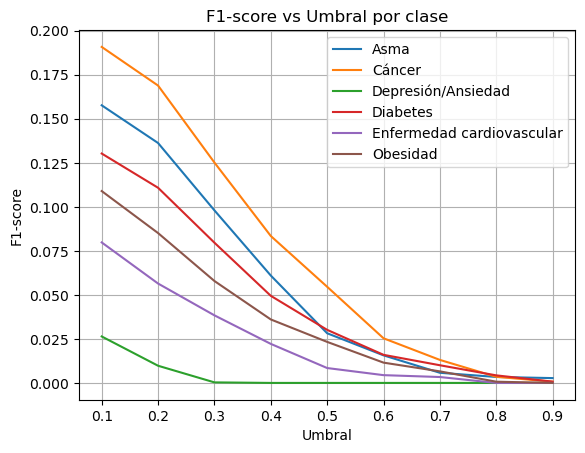

In [113]:

# 🧠 Entrenar modelo Bagging
base_estimator_ = DecisionTreeClassifier(random_state=42)
modelo = OneVsRestClassifier(
    BaggingClassifier(estimator=base_estimator_, n_estimators=50, random_state=42)
)

modelo.fit(X_train, y_train)

# 🔮 Obtener probabilidades del conjunto de prueba y entrenamiento
y_pred_proba_test = np.array(modelo.predict_proba(X_test))
y_pred_proba_train = np.array(modelo.predict_proba(X_train))

# 🧪 Inicializar búsqueda de umbrales por clase
umbrales = np.arange(0.1, 1.0, 0.1)
umbral_optimo_por_clase = []
f1_scores_por_umbral = {}

# 🎯 Buscar mejor umbral para cada clase (max F1-score)
for i in range(y_test.shape[1]):
    f1_scores = []
    for t in umbrales:
        y_pred_temp = (y_pred_proba_test[:, i] > t).astype(int)
        score = f1_score(y_test.iloc[:, i], y_pred_temp, zero_division=0)
        f1_scores.append(score)

    mejor_t = umbrales[np.argmax(f1_scores)]
    umbral_optimo_por_clase.append(mejor_t)
    f1_scores_por_umbral[i] = f1_scores

    print(f"Clase {y_test.columns[i]} - Mejor umbral: {mejor_t:.2f} - F1-score: {max(f1_scores):.3f}")

umbral_optimo_por_clase = np.array(umbral_optimo_por_clase)

# 🧾 Aplicar umbral óptimo
y_pred_test_custom = (y_pred_proba_test > umbral_optimo_por_clase).astype(int)
y_pred_train_custom = (y_pred_proba_train > umbral_optimo_por_clase).astype(int)

# 📊 Reportes finales
print("\n📊 Reporte en conjunto de prueba (test):\n")
print(classification_report(y_test, y_pred_test_custom, target_names=y_test.columns))

print("\n📊 Reporte en conjunto de entrenamiento (train):\n")
print(classification_report(y_train, y_pred_train_custom, target_names=y_train.columns))

# 📈 Gráfica: F1-score vs Umbral
for i, clase in enumerate(y_test.columns):
    plt.plot(umbrales, f1_scores_por_umbral[i], label=clase)

plt.xlabel("Umbral")
plt.ylabel("F1-score")
plt.title("F1-score vs Umbral por clase")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Hay otros modelos con mejores metricas, por lo tanto aplicar la tecnica de RandomOverSampler no es lo ideal en este  caso